# AV Behavior with friction implementation in rainy weather

In [1]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw
import json

## Testing Parameters

In [43]:
weather_param = [[20,0,0,70,0,0,0,10,10],
    [20,0,0,70,0,0,0,10,30],
    [20,0,0,70,0,0,0,10,70],
    [20,0,0,70,0,0,0,10,100]] 

def calc_fric(weather_list):
    return np.exp(-1.89711*weather_list[-1]/100) * (1-weather_list[-1]/100)**3 * 0.85 + 0.15

for i in range(len(weather_param)):
    friction_ratio = calc_fric(weather_param[i])
    weather_param[i] += [friction_ratio]

df = pd.DataFrame(weather_param, columns =["cloudiness","precipitation","precipitation_deposits","sun_altitude_angle","sun_azimuth_angle","wetness","fog_density","wind_intensity", "ice_thickness", "friction_ratio"],
) 
# df.index.name = 'Scenarios'
df.to_csv("icy_fric.csv")
df

cloudiness  precipitation  precipitation_deposits  sun_altitude_angle  \
0          20              0                       0                  70   
1          20              0                       0                  70   
2          20              0                       0                  70   
3          20              0                       0                  70   

   sun_azimuth_angle  wetness  fog_density  wind_intensity  ice_thickness  \
0                  0        0            0              10             10   
1                  0        0            0              10             30   
2                  0        0            0              10             70   
3                  0        0            0              10            100   

   friction_ratio  
0        0.662573  
1        0.315022  
2        0.156082  
3        0.150000

### With reduced friction

In [3]:
os.chdir("C:\\Users\kilob\Senior Research & Thesis\\Simulations")

In [4]:
rel_path = "./Data/Ghost Cutin/Icy Reduced Friction Exponential"
os.path.isdir(rel_path)

True

In [5]:
subfolders = os.listdir(path=rel_path)
subfolders

['route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon_fi_ghost_cutin']

In [6]:
head = subfolders.pop(0)
subfolders.append(head)
subfolders[-1], subfolders[-2] = subfolders[-2], subfolders[-1]
subfolders

['route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon_fi_ghost_cutin']

In [7]:
txt_lists_fric = [[] for i in range(5)]

for i in range(len(txt_lists_fric)):
    for root, dirs, files in os.walk(os.path.join(rel_path, subfolders[i])):
        for file in files:
            if file.endswith(".txt"):
                 with open(os.path.join(root, file), encoding = 'utf-8') as f:
                    read_string = f.read()
                    json_object = json.loads(read_string)
                    txt_lists_fric[i].append(json_object)

In [8]:
txt_lists_fric[2][50]
# txt_lists_fric[0]

{'_checkpoint': {'global_record': {},
  'progress': [0, 1],
  'records': [{'index': 0,
    'infractions': {'collisions_layout': [],
     'collisions_pedestrian': [],
     'collisions_vehicle': ['Agent collided against object with type=vehicle.tesla.model3 and id=46188 at (x=192.377, y=6.094, z=-0.02)'],
     'outside_route_lanes': [],
     'red_light': [],
     'route_dev': [],
     'route_timeout': [],
     'stop_infraction': [],
     'vehicle_blocked': []},
    'meta': {'duration_game': 16.050000239163637,
     'duration_system': 29.61950445175171,
     'route_length': 131.56012567009267},
    'route_id': 'RouteScenario_0',
    'scores': {'score_composed': 42.26506099847932,
     'score_penalty': 0.6,
     'score_route': 70.44176833079887},
    'status': 'Failed'}]},
 'eligible': False,
 'entry_status': 'Started',
 'labels': [],
 'sensors': ['carla_camera',
  'carla_camera',
  'carla_camera',
  'carla_imu',
  'carla_gnss',
  'carla_speedometer'],
 'values': []}

In [9]:
avg_complete_fric = [_] * 5

for i in range(len(txt_lists_fric)):
    count = 0
    for txt in txt_lists_fric[i]:
        if txt['_checkpoint']['records'][0]['status'] == 'Completed':
            count += 1
    avg_complete_fric[i] = count/100
    
df = pd.DataFrame({'Scenarios':subfolders, 'Average complete ratio':avg_complete_fric}) 
# df.index.name = 'Scenarios'

df

Scenarios  \
0   route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   
1   route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   
2   route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   
3  route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin   
4          route_highway_epoch24_clear-noon_fi_ghost_cutin   

   Average complete ratio  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     1.0

In [10]:
count = 0

avg_score_fric = [_] * 5

for i in range(len(txt_lists_fric)):
    count = 0
    for txt in txt_lists_fric[i]:
        count += txt['_checkpoint']['records'][0]['scores']['score_route'] 
    avg_score_fric[i] = count/100
    
df = pd.DataFrame({'Scenarios':subfolders, 'Average score route':avg_score_fric}) 
df

Scenarios  \
0   route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   
1   route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   
2   route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   
3  route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin   
4          route_highway_epoch24_clear-noon_fi_ghost_cutin   

   Average score route  
0            54.222744  
1            52.200590  
2            57.364900  
3            49.835052  
4           100.000000

#### Setting up into list of DataFrames

In [11]:
os.chdir("C:\\Users\kilob\Senior Research & Thesis\\Simulations")

In [12]:
df_array_fric = np.empty((5,100), dtype=object)

for i in range(len(df_array_fric)):
    for j in range((len(df_array_fric[i]))):
        df_array_fric[i][j] = pd.DataFrame()

In [13]:
for i in range(len(txt_lists_fric)):
    dir_path = os.path.join(rel_path, subfolders[i])
    print(dir_path)
    # list to store files
    res = []

    # Iterate directory
    run_index = 0
    for path in os.listdir(dir_path):
        # check if current path is a file
        if not os.path.isfile(os.path.join(dir_path, path)):
            df = pd.DataFrame()
            for file in os.listdir(os.path.join(dir_path, path)):
                file_path = os.path.join(dir_path, os.path.join(path, file))
    #             print("file_path", file_path)
                if "_ctl.csv" in file_path:
                    df = pd.read_csv(file_path)
                elif "_cvip.csv" in file_path:
                    temp = pd.read_csv(file_path)
                    df = pd.concat([df, temp], axis=1)
                elif "_traj.csv" in file_path:
                    temp = pd.read_csv(file_path)
                    df = pd.concat([df, temp], axis=1)

            df_array_fric[i][run_index] = df
            run_index += 1

./Data/Ghost Cutin/Icy Reduced Friction Exponential\route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin
./Data/Ghost Cutin/Icy Reduced Friction Exponential\route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin
./Data/Ghost Cutin/Icy Reduced Friction Exponential\route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin
./Data/Ghost Cutin/Icy Reduced Friction Exponential\route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin
./Data/Ghost Cutin/Icy Reduced Friction Exponential\route_highway_epoch24_clear-noon_fi_ghost_cutin


In [14]:
df_array_fric[4][99]

ts  agent_id  throttle     steer  brake      ts  agent_id  \
0    709418         0  0.900000  0.004418    0.0  709418         0   
1    709419         0  0.900000  0.003064    0.0  709419         0   
2    709420         0  0.900000  0.002815    0.0  709420         0   
3    709421         0  0.900000  0.002956    0.0  709421         0   
4    709422         0  0.900000  0.002981    0.0  709422         0   
..      ...       ...       ...       ...    ...     ...       ...   
747  710165         0  0.491927 -0.006250    0.0  710165         0   
748  710166         0  0.518111 -0.005507    0.0  710166         0   
749  710167         0  0.473148 -0.004278    0.0  710167         0   
750  710168         0  0.431506 -0.004242    0.0  710168         0   
751  710169         0  0.446253 -0.005309    0.0  710169         0   

           cvip      cvip_x     cvip_y      cvip_z      ts  agent_id  \
0    500.491189  198.767441 -95.832657 -499.819366  709418         0   
1      5.595580  195.567444 -90.832657    0.100000  709419         0   
2      5.592365  195.567444 -90.832657    0.095407  709420         0   
3      5.589578  195.567444 -90.832657    0.084691  709421         0   
4      5.587154  195.567444 -90.832657    0.069311  709422         0   
..          ...         ...        ...         ...     ...       ...   
747   53.189921  192.583557  96.160210    0.001820  710165         0   
748   53.291293  192.579529  96.494072    0.001825  710166         0   
749   53.392130  192.575363  96.827538    0.001831  710167         0   
750   53.492340  192.571106  97.160522    0.001838  710168         0   
751   53.591925  192.566757  97.493027    0.001845  710169         0   

              x          y         z         v  
0    192.362411 -86.262680  0.539326  0.000000  
1    192.362411 -86.262680  0.491906  0.000000  
2    192.362411 -86.262680  0.438374  0.000000  
3    192.362411 -86.262680  0.378732  0.000000  
4    192.362411 -86.262680  0.312981  0.000000  
..          ...        ...       ...       ...  
747  193.160782  42.973431  0.033870  9.296790  
748  193.157364  43.205921  0.033867  9.302036  
749  193.154037  43.438553  0.033864  9.307610  
750  193.150818  43.671333  0.033862  9.313437  
751  193.147614  43.904259  0.033859  9.319572  

[752 rows x 17 columns]

In [15]:
df_array_fric[0][0]['x']

0      192.362411
1      192.362411
2      192.362411
3      192.362411
4      192.362411
          ...    
432    193.177933
433    193.180588
434    193.183105
435    193.185486
436    193.187744
Name: x, Length: 437, dtype: float64

## Comparing completion rate and scores

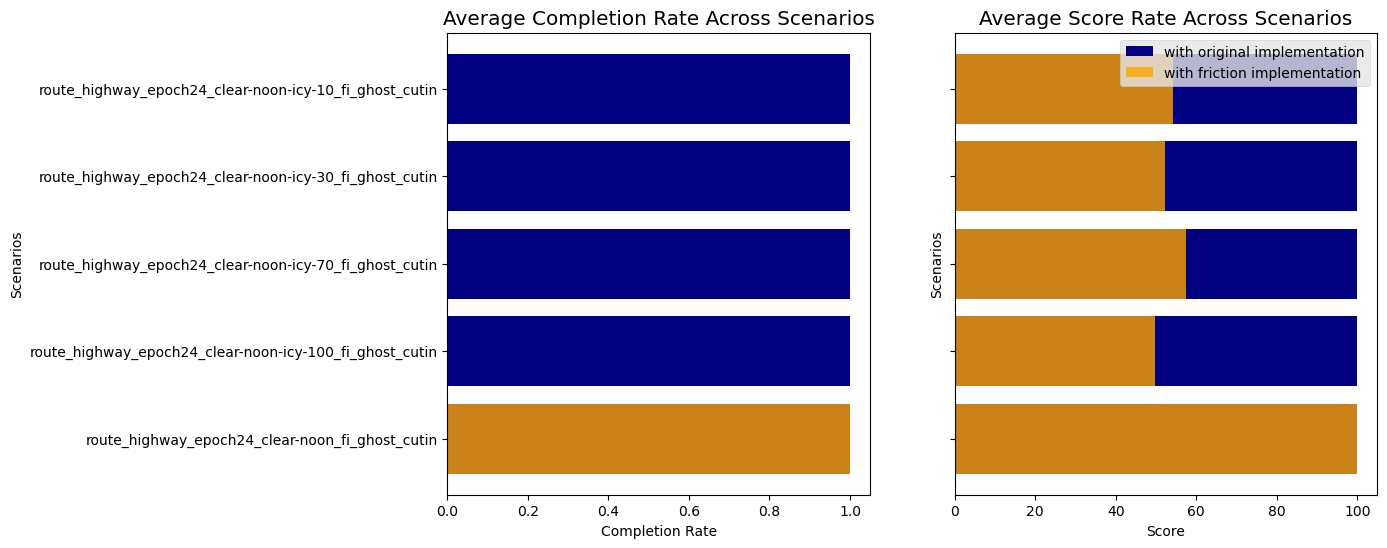

In [16]:
friction_legend = ["with original implementation", "with friction implementation"]

plt.subplots(1, 2, sharey=True, figsize=(12,6))
plt.gca().invert_yaxis()
width = 0.25

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.barh(subfolders, avg_complete_fric[-1], label=friction_legend[0], color="navy")
plt.barh(subfolders, avg_complete_fric, label=friction_legend[1], color="orange" , alpha = 0.8)
plt.title('Average Completion Rate Across Scenarios')
plt.ylabel('Scenarios')
plt.xlabel('Completion Rate')


plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.barh(subfolders, avg_score_fric[-1], label=friction_legend[0], color="navy")
plt.barh(subfolders, avg_score_fric, label=friction_legend[1], color="orange" , alpha = 0.8)
plt.title('Average Score Rate Across Scenarios')
plt.ylabel('Scenarios')
plt.xlabel('Score')

plt.legend()
plt.show()

## Comparison

In [17]:
attribute_order = ["x", "y", "v", "cvip", "steer", "brake", "throttle"]

all_medians = np.empty((len(txt_lists_fric), len(attribute_order)), dtype=object)
# [[] * len(attribute_order)  for i in range(len(txt_lists_fric))]

all_medians

array([[None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None]], dtype=object)

In [18]:
friction_legend = [" with original implementation", " with friction implementation"]
full_legend = subfolders.copy()
# for i in range(len(subfolders)):
#     if i == len(subfolders)-1:
#         full_legend.append(subfolders[i]+friction_legend[0])
#     else:
#         full_legend.append(subfolders[i]+friction_legend[1])


full_legend

['route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin',
 'route_highway_epoch24_clear-noon_fi_ghost_cutin']

### x,y traces

In [19]:
df_orig_x = pd.DataFrame()
df_orig_y = pd.DataFrame()

weather = -1
for i in range(len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['x'].dtypes == 'object' or df_array_fric[weather][i]['y'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['x'].isnull().values.any() and not df_array_fric[weather][i]['y'].isnull().values.any():
            df_orig_x["Run"+str(i)] = df_array_fric[weather][i]['x']
            df_orig_y["Run"+str(i)] = df_array_fric[weather][i]['y']

median_orig_x = df_orig_x.median(axis=1)
median_orig_y = df_orig_y.median(axis=1)

all_medians[weather][0] = median_orig_x
all_medians[weather][1] = median_orig_y


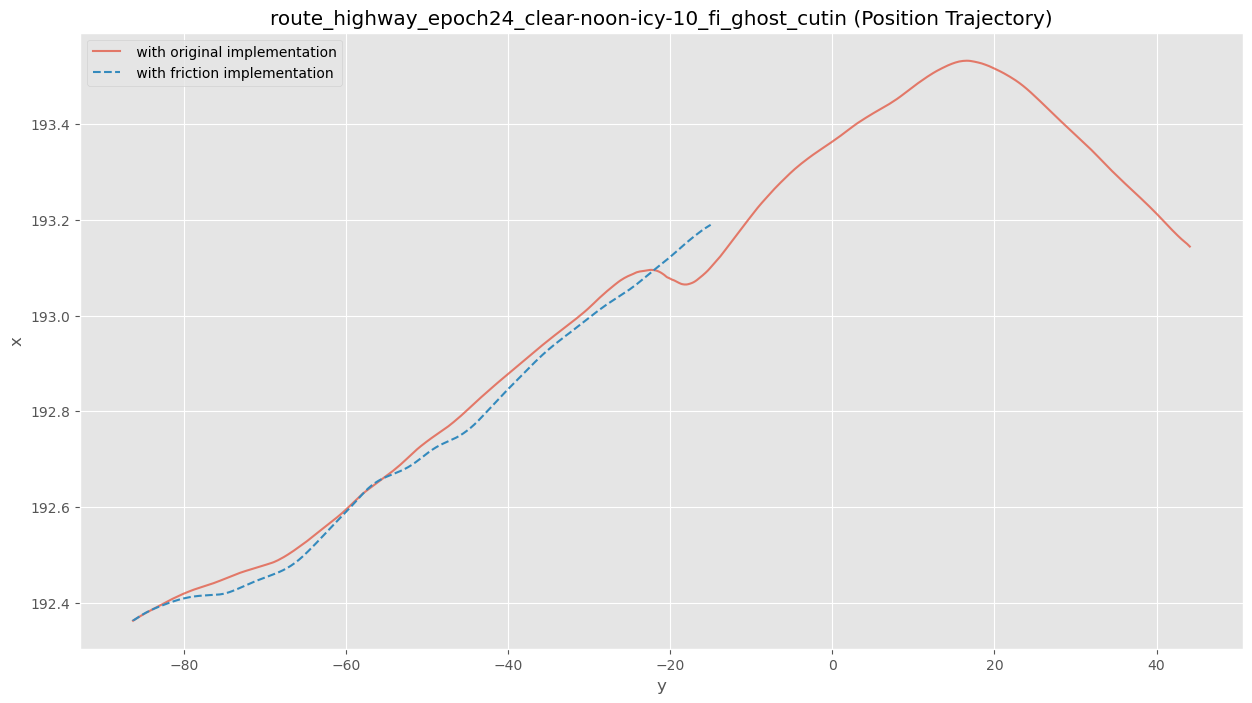

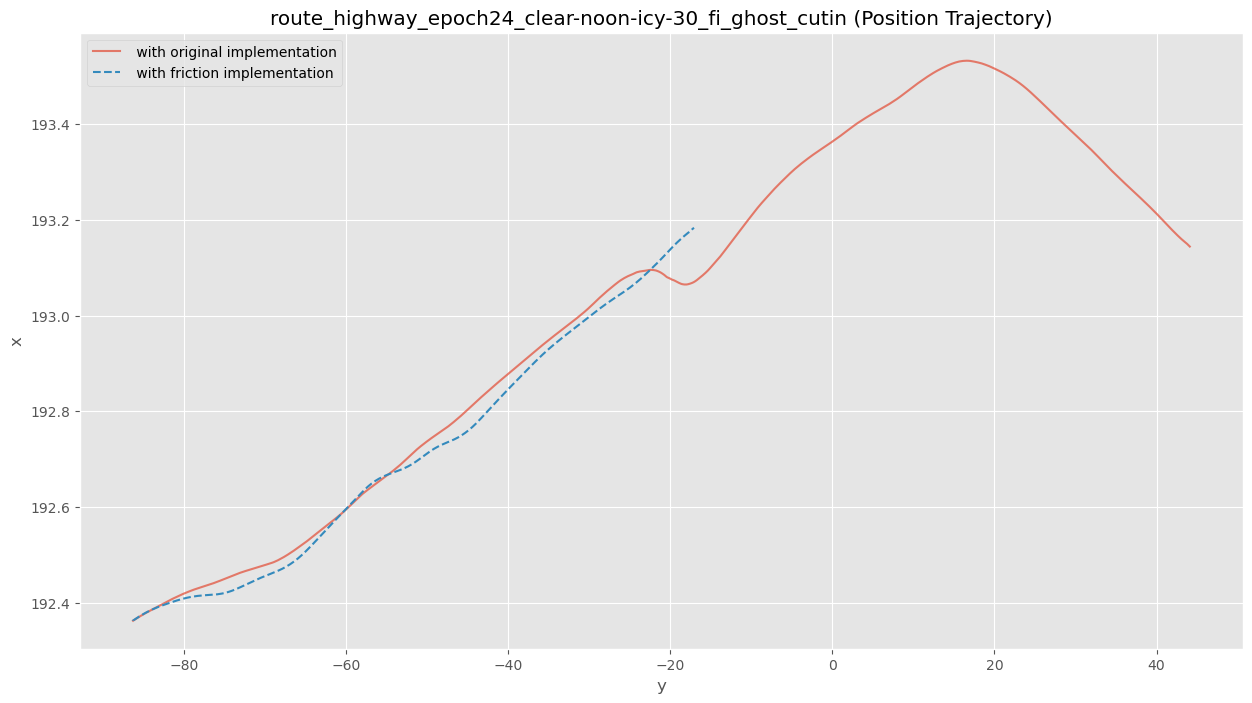

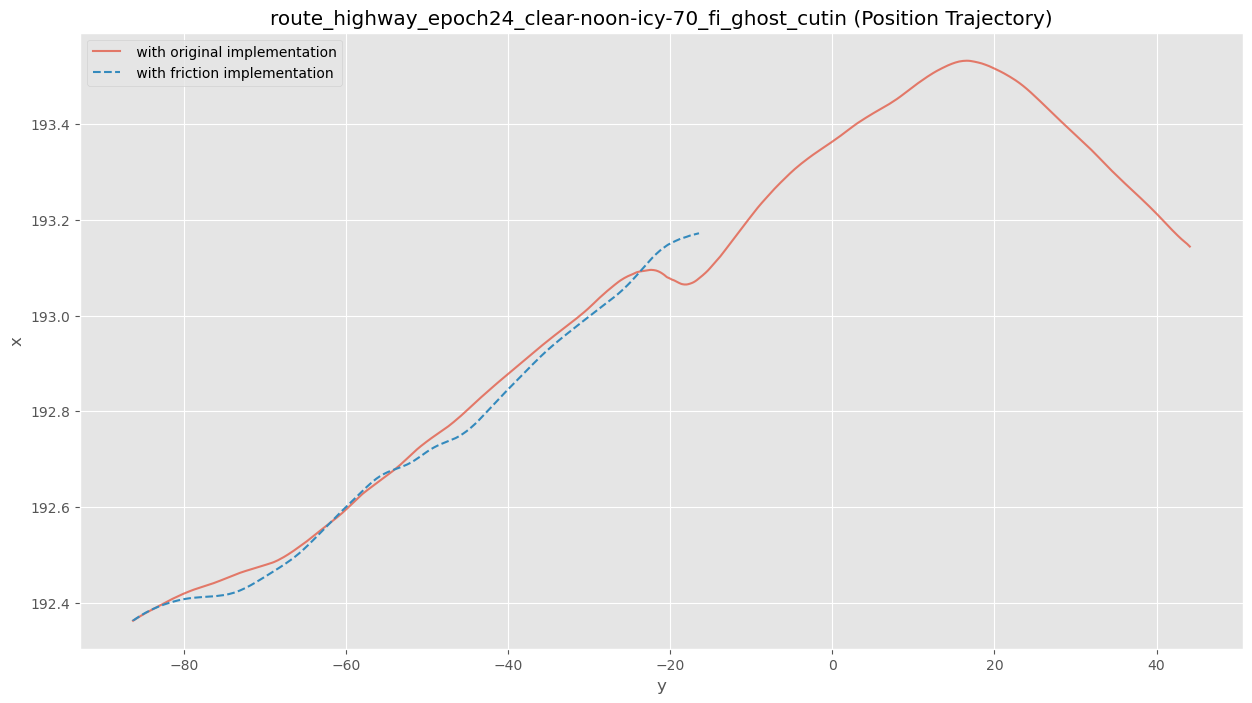

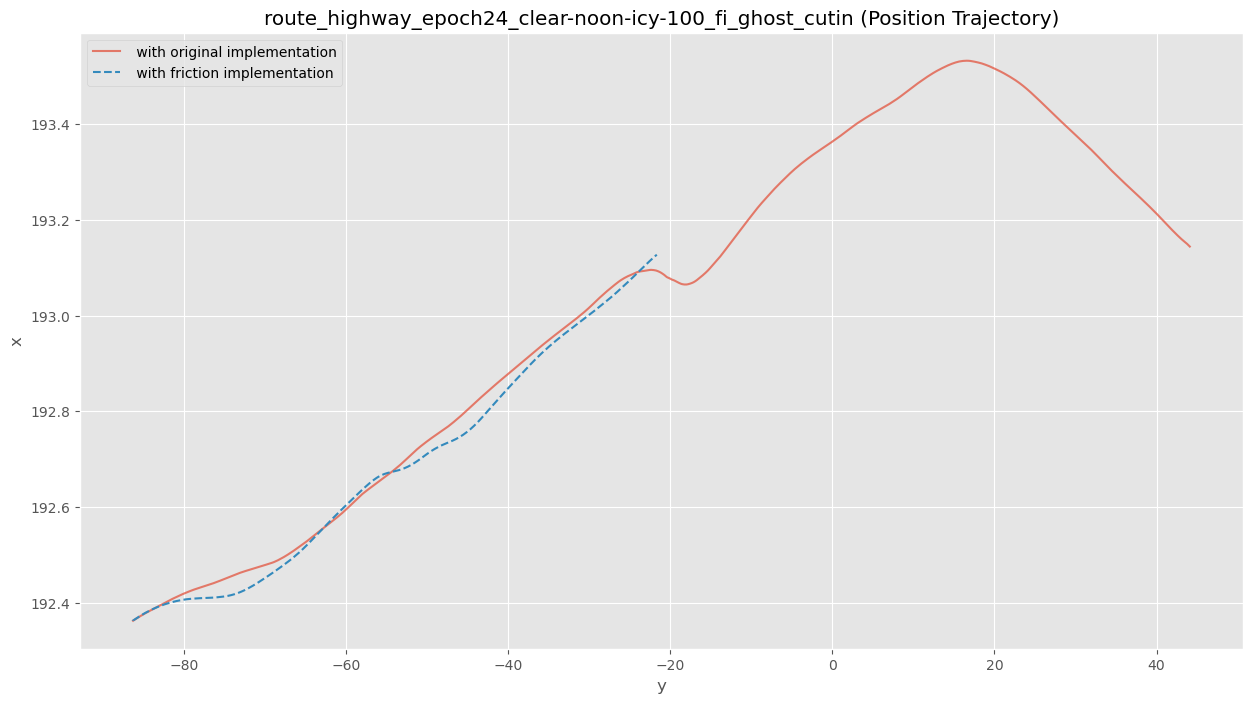

In [20]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))

    df_fric_x = pd.DataFrame()
    df_fric_y = pd.DataFrame()

    for i in range(0, len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['x'].dtypes == 'object' or df_array_fric[weather][i]['y'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['x'].isnull().values.any() and not df_array_fric[weather][i]['y'].isnull().values.any():
                df_fric_x["Run"+str(i)] = df_array_fric[weather][i]['x']
                df_fric_y["Run"+str(i)] = df_array_fric[weather][i]['y']

    median_fric_x = df_fric_x.median(axis=1)
    median_fric_y = df_fric_y.median(axis=1)

    
    all_medians[weather][0] = median_fric_x
    all_medians[weather][1] = median_fric_y
    
    plt.plot(median_orig_y, median_orig_x, alpha=0.7)
    plt.plot(median_fric_y, median_fric_x, '--')
    plt.xlabel("y")
    plt.ylabel("x")
    
    plt.title(subfolders[weather] + " (Position Trajectory)")
    plt.legend(friction_legend)
    plt.show()
    

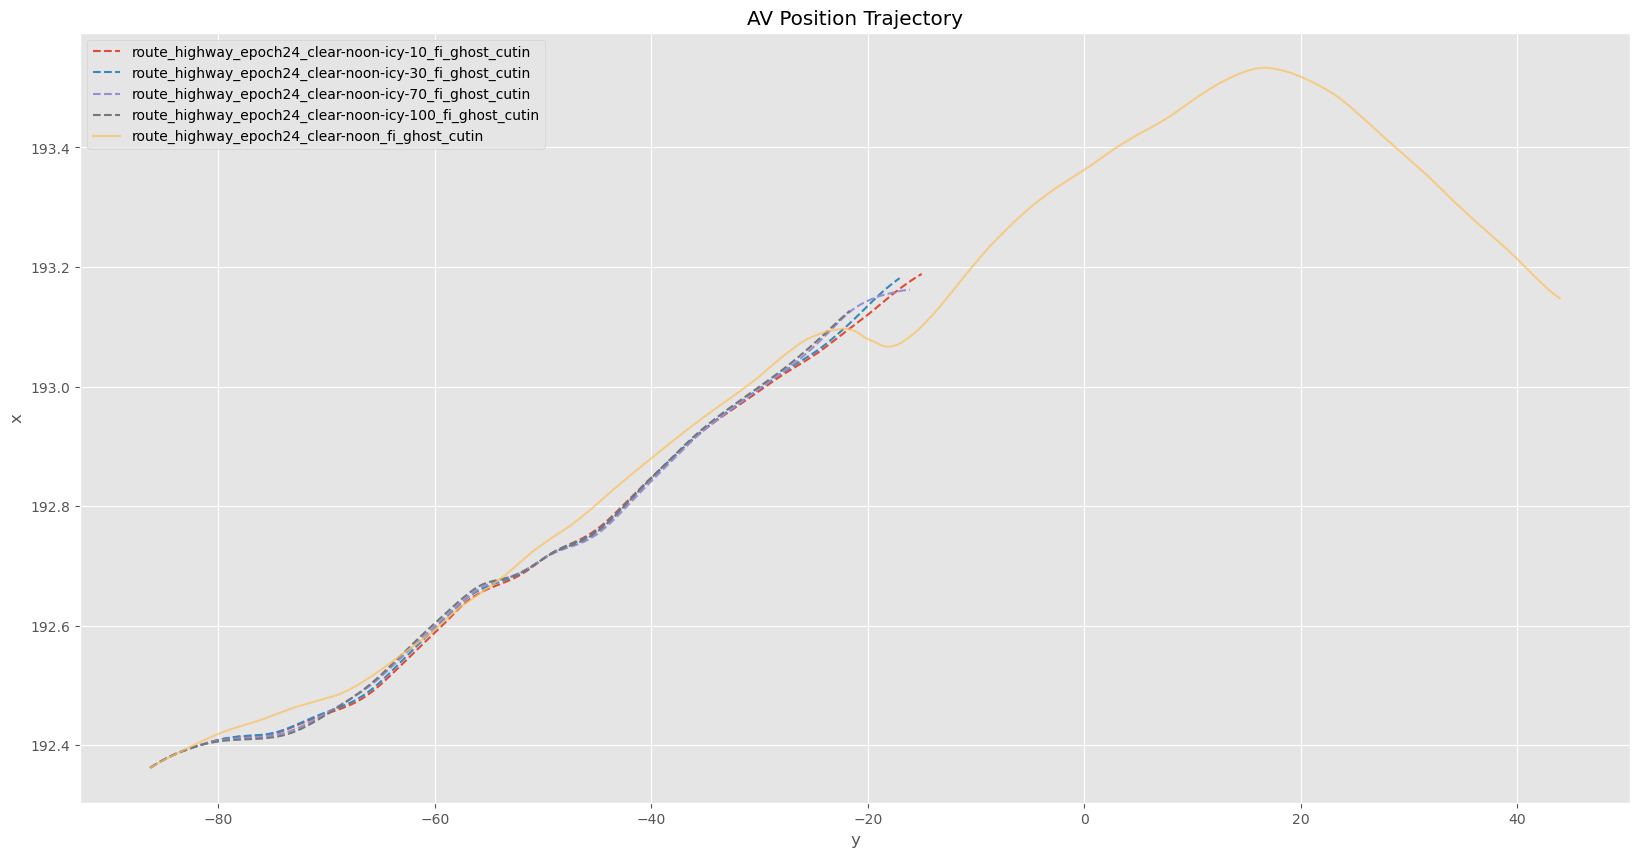

In [21]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    df_orig_x = pd.DataFrame()
    df_orig_y = pd.DataFrame()

    i = -1
    if(df_array_fric[weather][i]['x'].dtypes == 'object' or df_array_fric[weather][i]['y'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['x'].isnull().values.any() and not df_array_fric[i][weather]['y'].isnull().values.any():
            df_orig_x["Run"+str(i)] = df_array_fric[weather][i]['x']
            df_orig_y["Run"+str(i)] = df_array_fric[weather][i]['y']

    median_orig_x = df_orig_x.median(axis=1)
    median_orig_y = df_orig_y.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_y, median_orig_x, alpha=0.7)
    else:
        plt.plot(median_orig_y, median_orig_x, '--')

plt.xlabel("y")
plt.ylabel("x")
plt.title("AV Position Trajectory")
plt.legend(full_legend)
plt.show()

### v

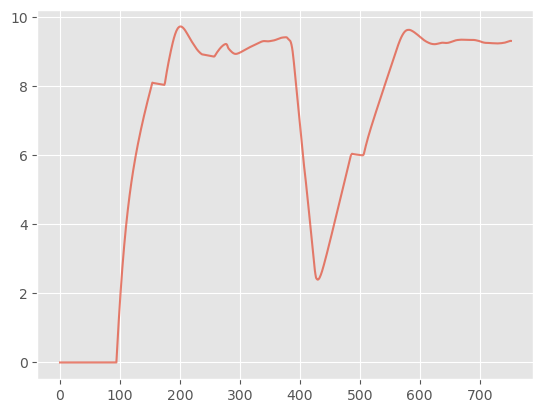

In [22]:
df_orig_v = pd.DataFrame()

weather = -1
for i in range(0, len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['v'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['v'].isnull().values.any():
            df_orig_v["Run"+str(i)] = df_array_fric[weather][i]['v']

median_orig_v = df_orig_v.median(axis=1)
all_medians[weather][2] = median_orig_v

plt.plot(median_orig_v, alpha=0.7)

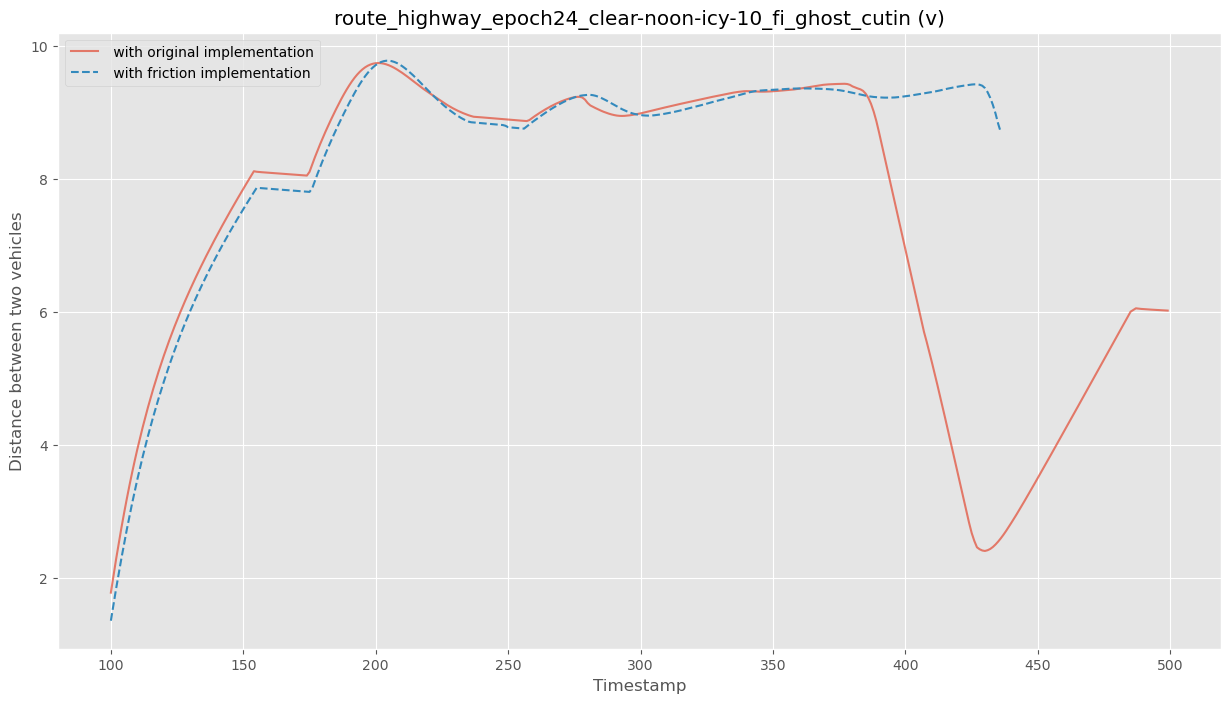

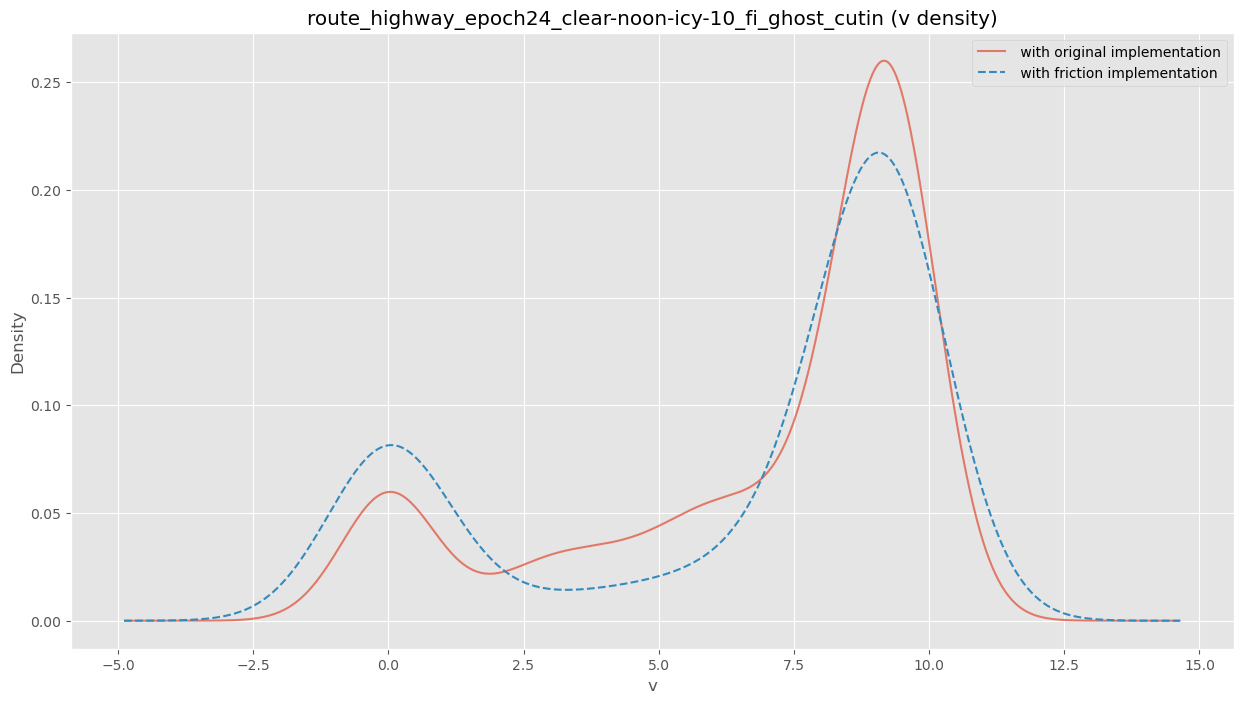

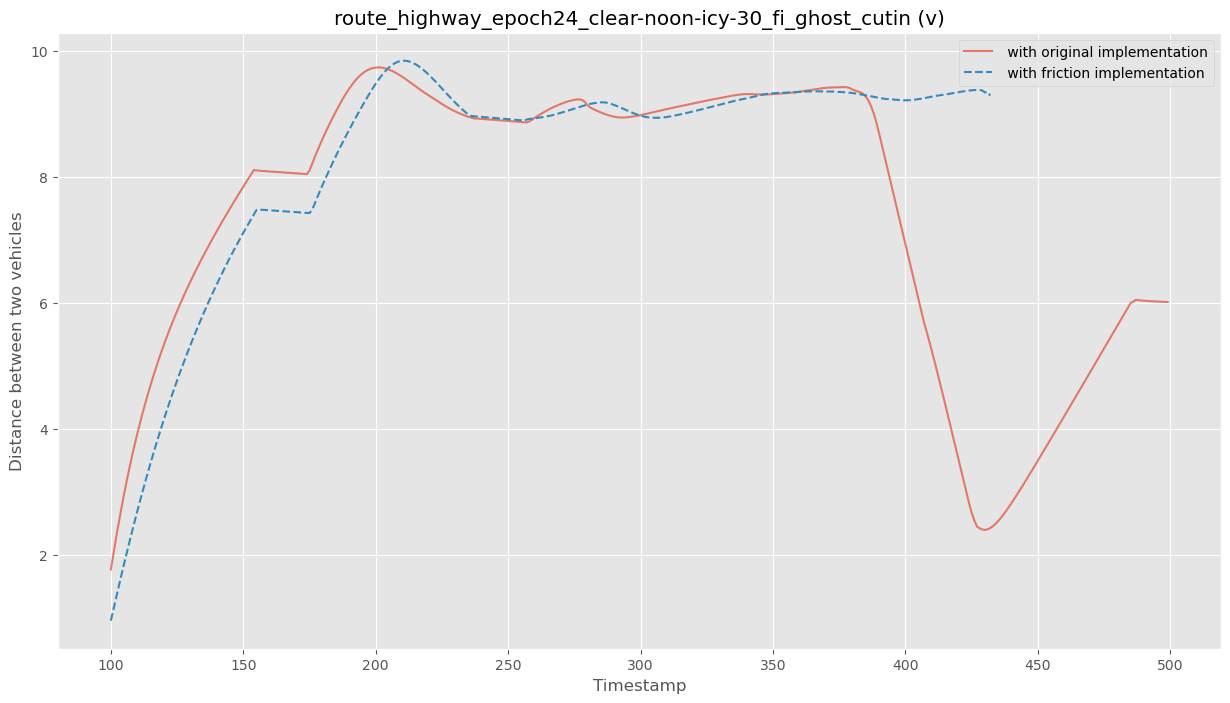

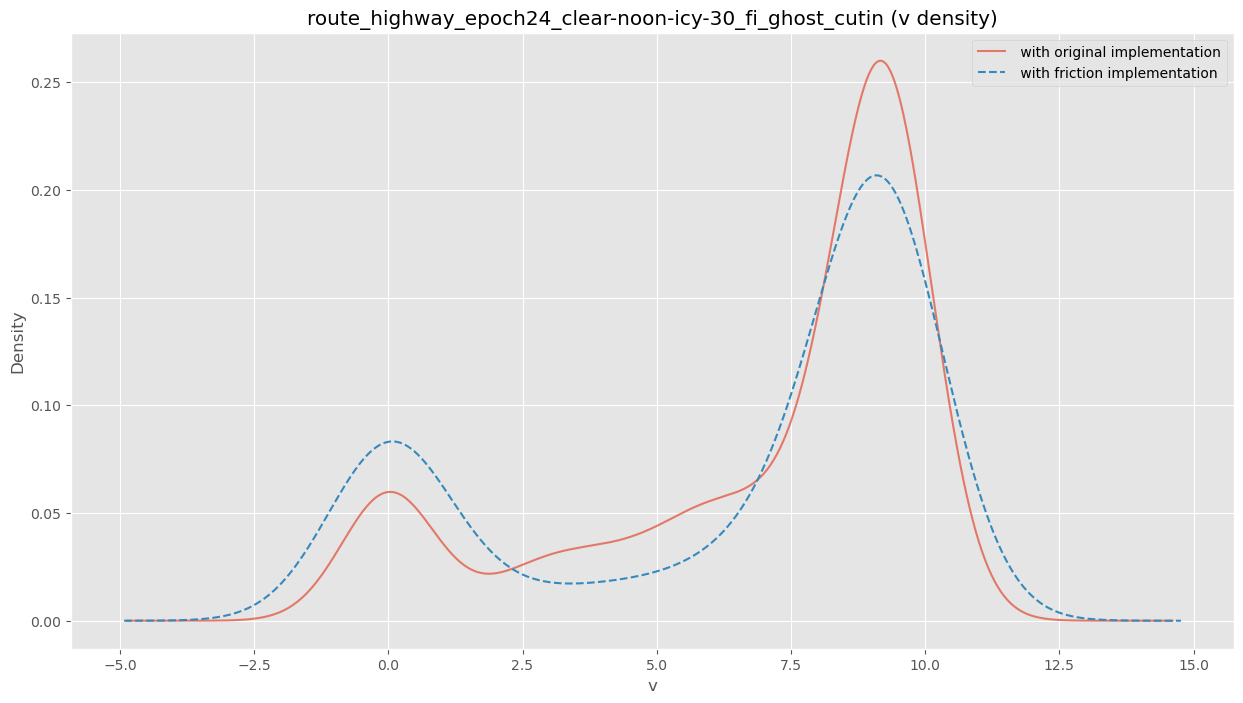

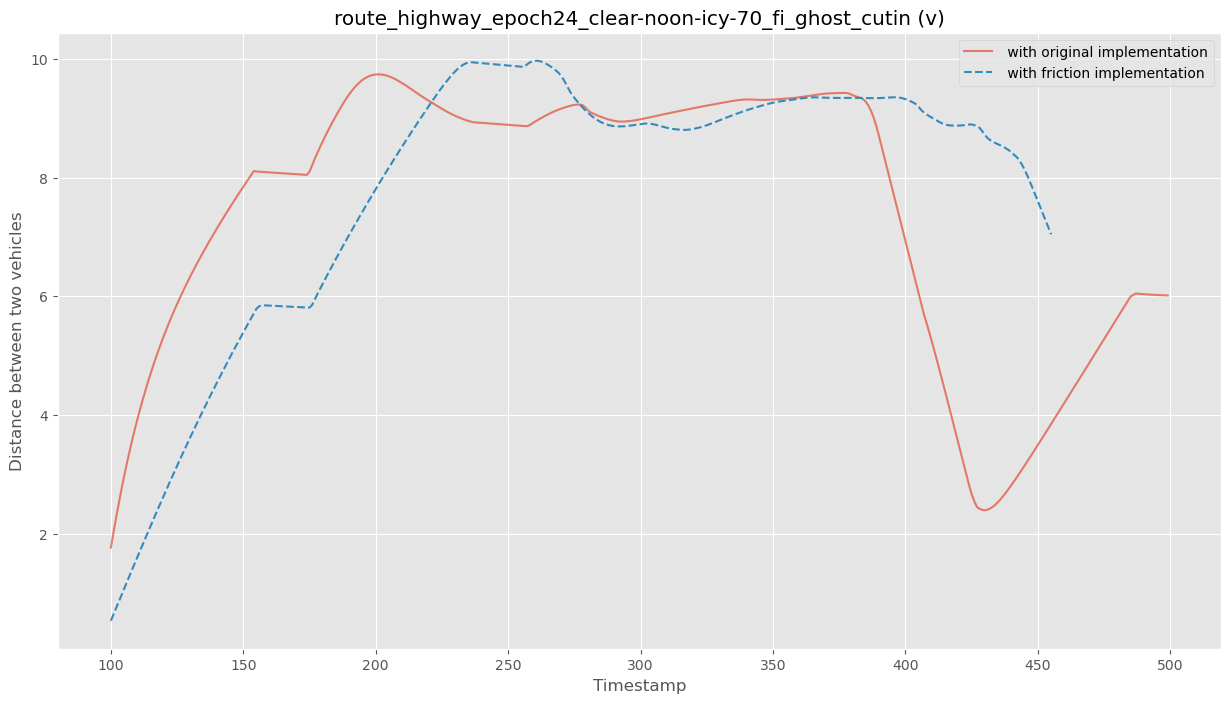

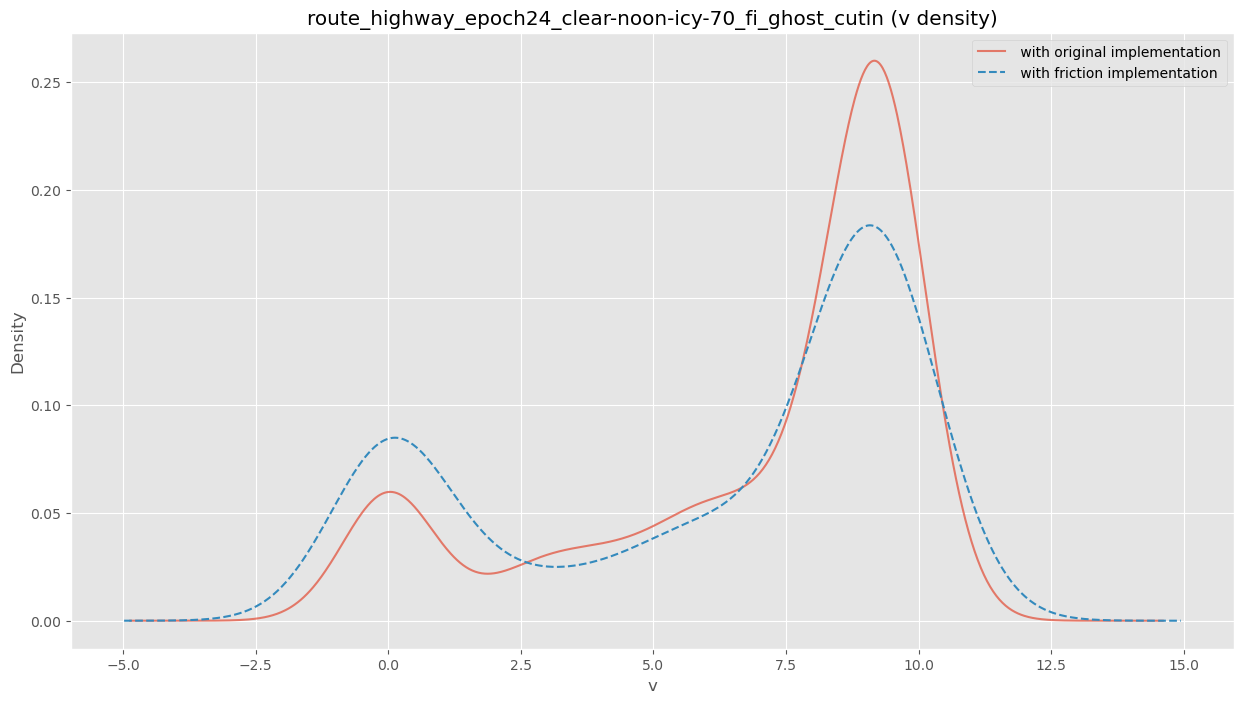

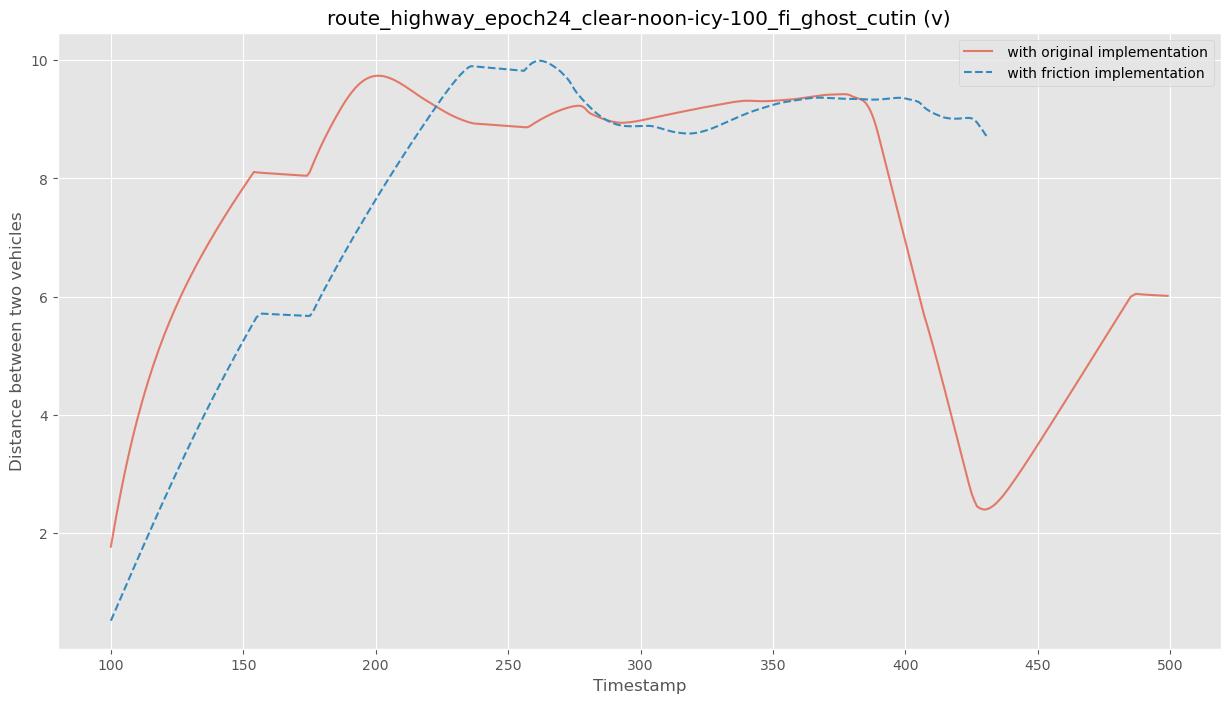

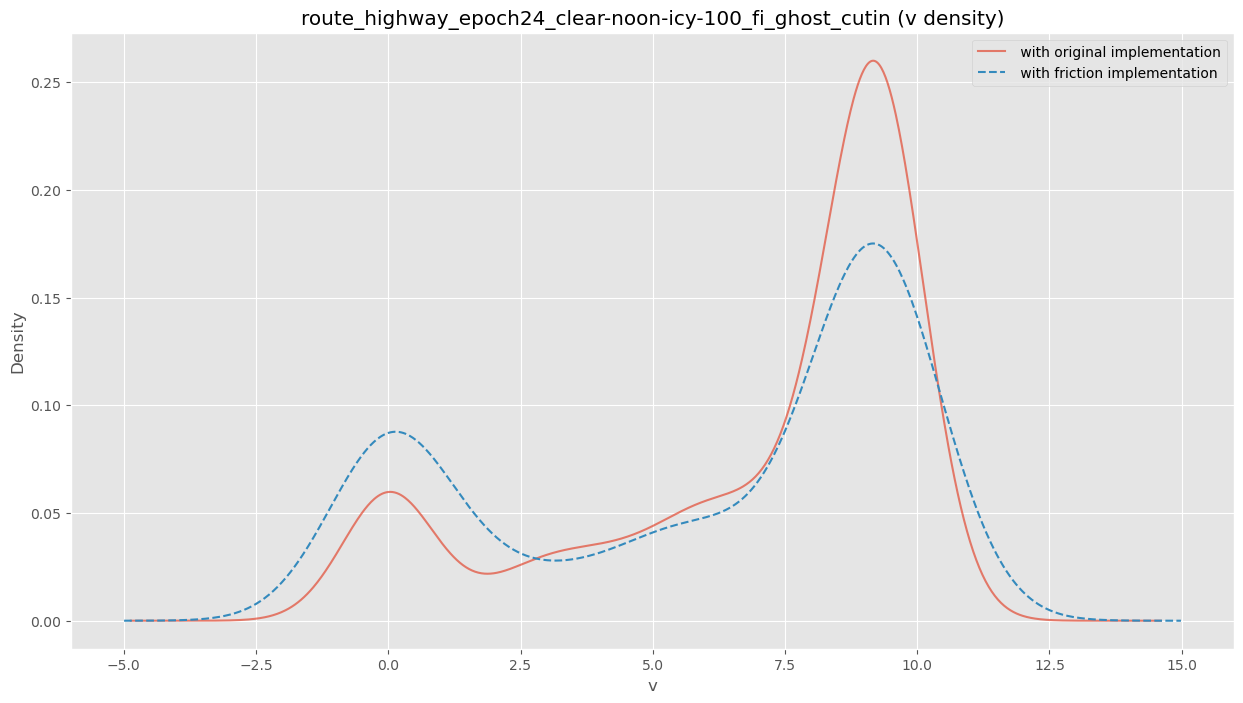

In [23]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))
    
    df_fric_v = pd.DataFrame()

    for i in range(len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['v'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['v'].isnull().values.any():
                df_fric_v["Run"+str(i)] = df_array_fric[weather][i]['v']

    median_fric_v = df_fric_v.median(axis=1)
    
    all_medians[weather][2] = median_fric_v
    
    plt.plot(median_orig_v.iloc[100:500], alpha=0.7)
    plt.plot(median_fric_v.iloc[100:500], '--')
    
    plt.title(subfolders[weather])
    plt.legend(friction_legend)
    plt.xlabel("Timestamp")
    plt.ylabel("Distance between two vehicles")
    plt.title(subfolders[weather] + " (v)")
    plt.show()
    
    plt.figure(figsize=(15,8))
    plt.xlabel("v")
    plt.ylabel("Density")
    median_orig_v.plot.density(alpha=0.7)
    median_fric_v.plot.density(style='--')
    plt.title(subfolders[weather] + " (v density)")
    plt.legend(friction_legend)
    plt.show()

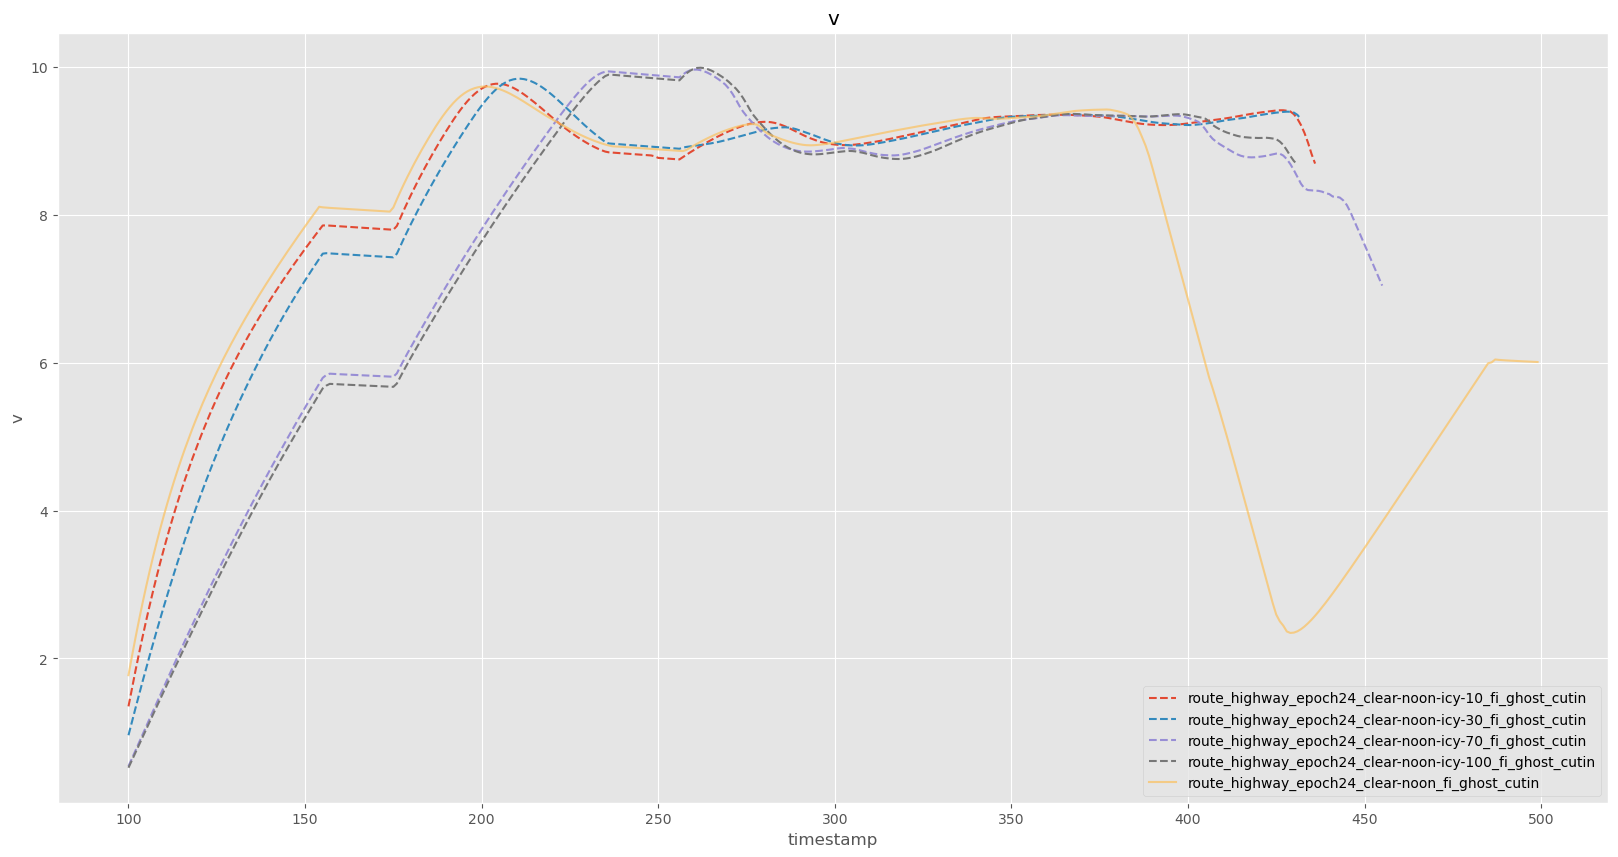

In [24]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    
    df_orig_v = pd.DataFrame()

    for i in range(0, len(df_array_fric)):
        if(df_array_fric[weather][i]['v'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['v'].isnull().values.any():
                df_orig_v["Run"+str(i)] = df_array_fric[weather][i]['v']

    median_orig_v = df_orig_v.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_v.iloc[100:500], alpha=0.7)
    else:
        plt.plot(median_orig_v.iloc[100:500], '--')

plt.xlabel("timestamp")
plt.ylabel("v")
plt.title("v")
plt.legend(full_legend)
plt.show()

### cvip

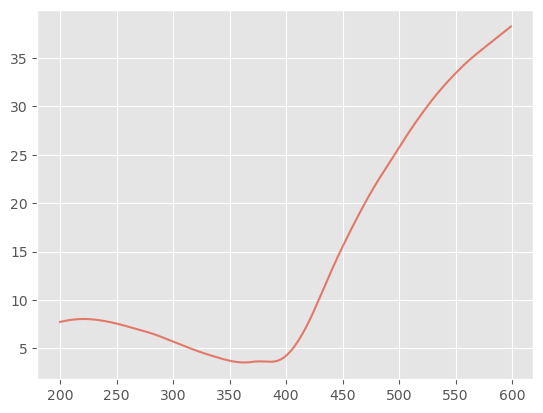

In [25]:
df_orig_cvip = pd.DataFrame()

weather = -1

for i in range(0, len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['cvip'].isnull().values.any():
            df_orig_cvip["Run"+str(i)] = df_array_fric[weather][i]['cvip']

median_orig_cvip = df_orig_cvip.median(axis=1)
all_medians[weather][3] = median_orig_cvip


plt.plot(median_orig_cvip.iloc[200:600], alpha=0.7)

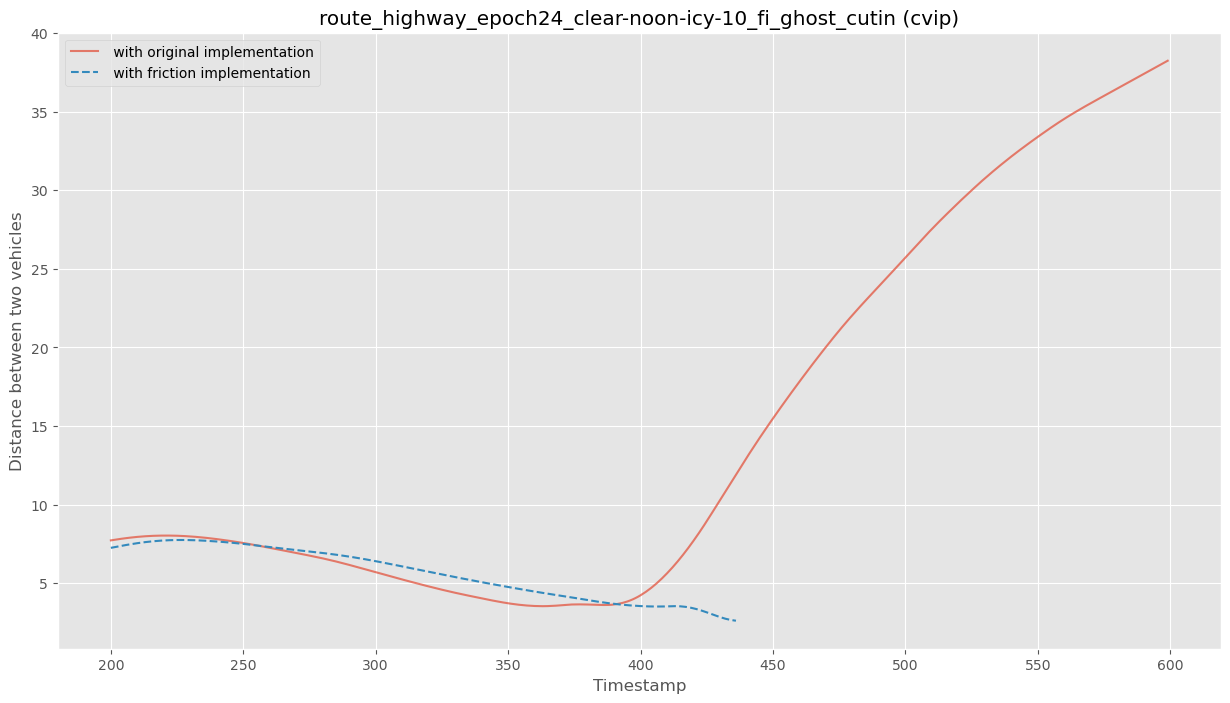

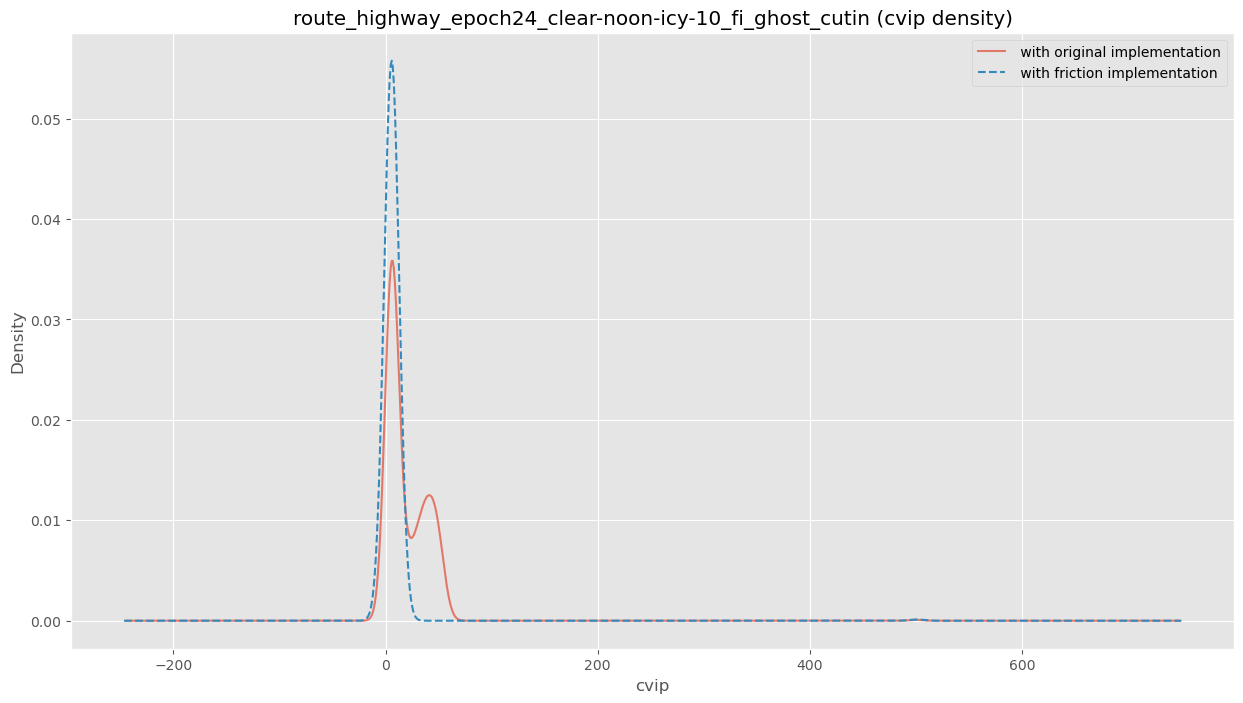

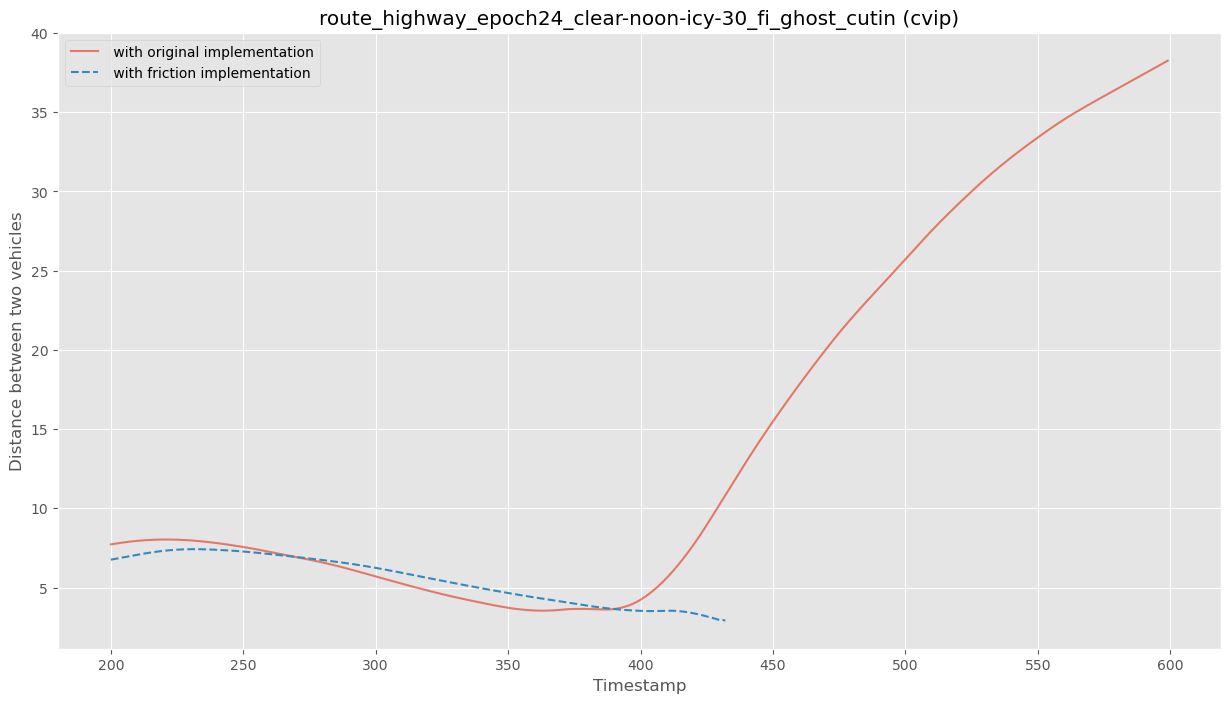

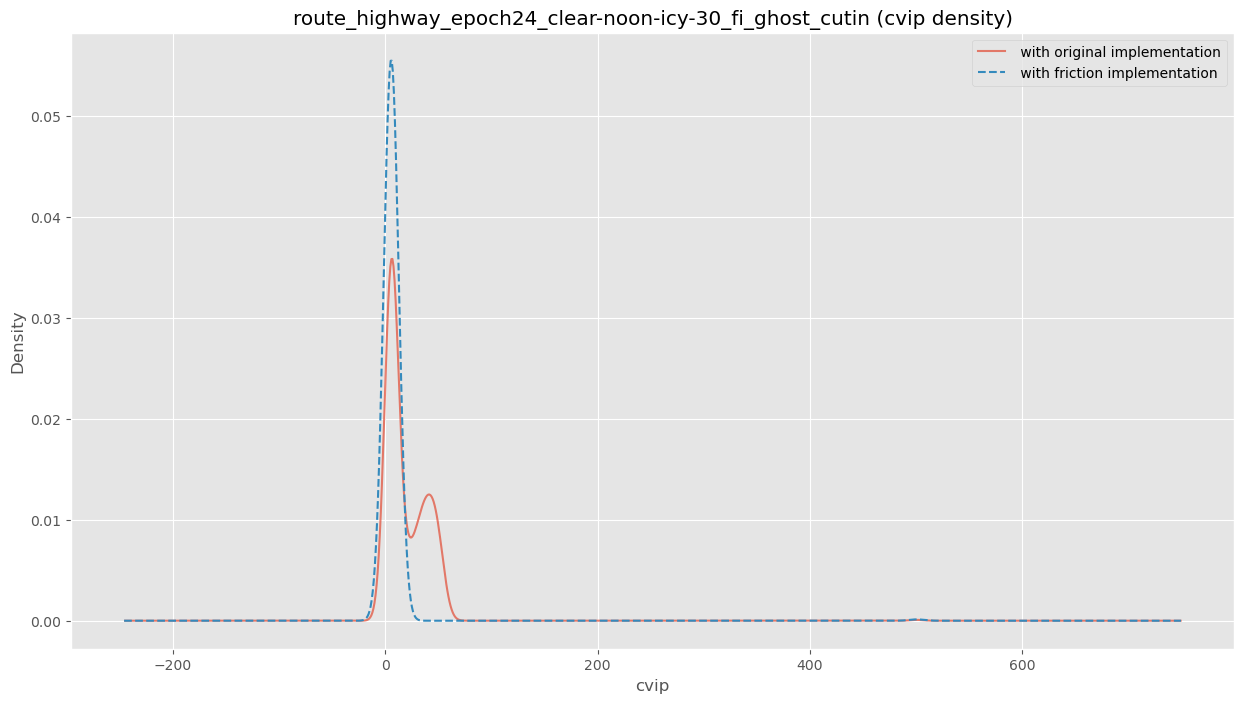

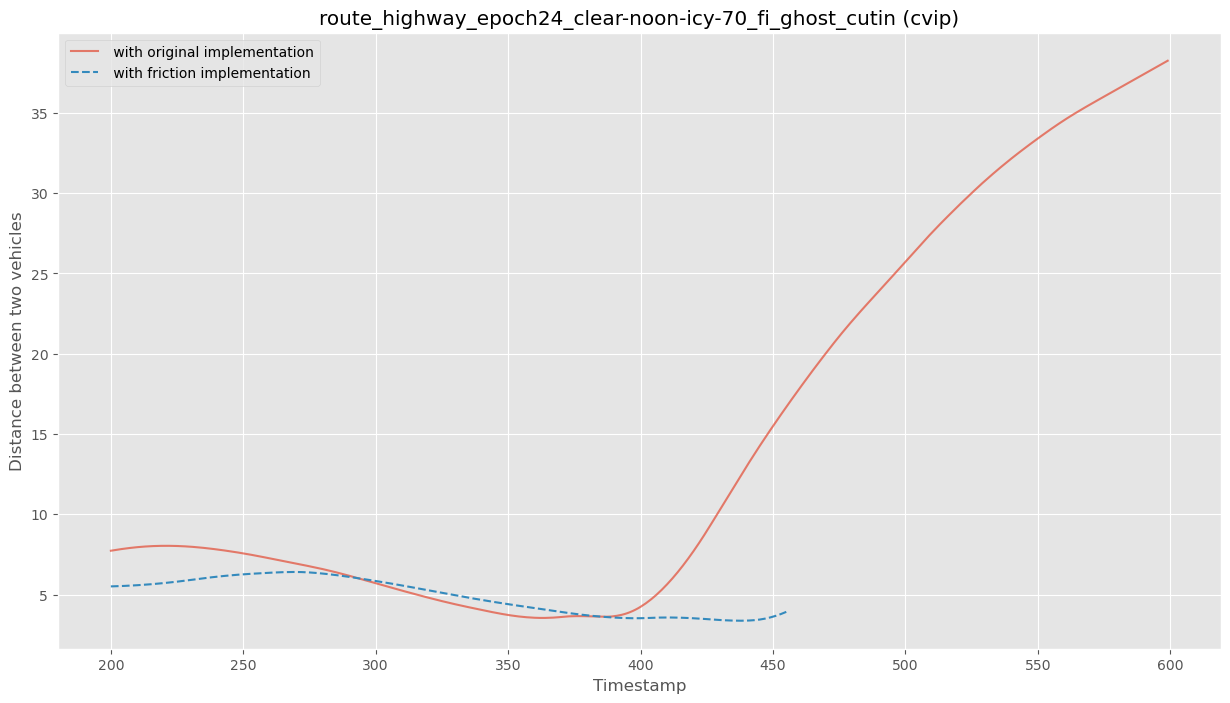

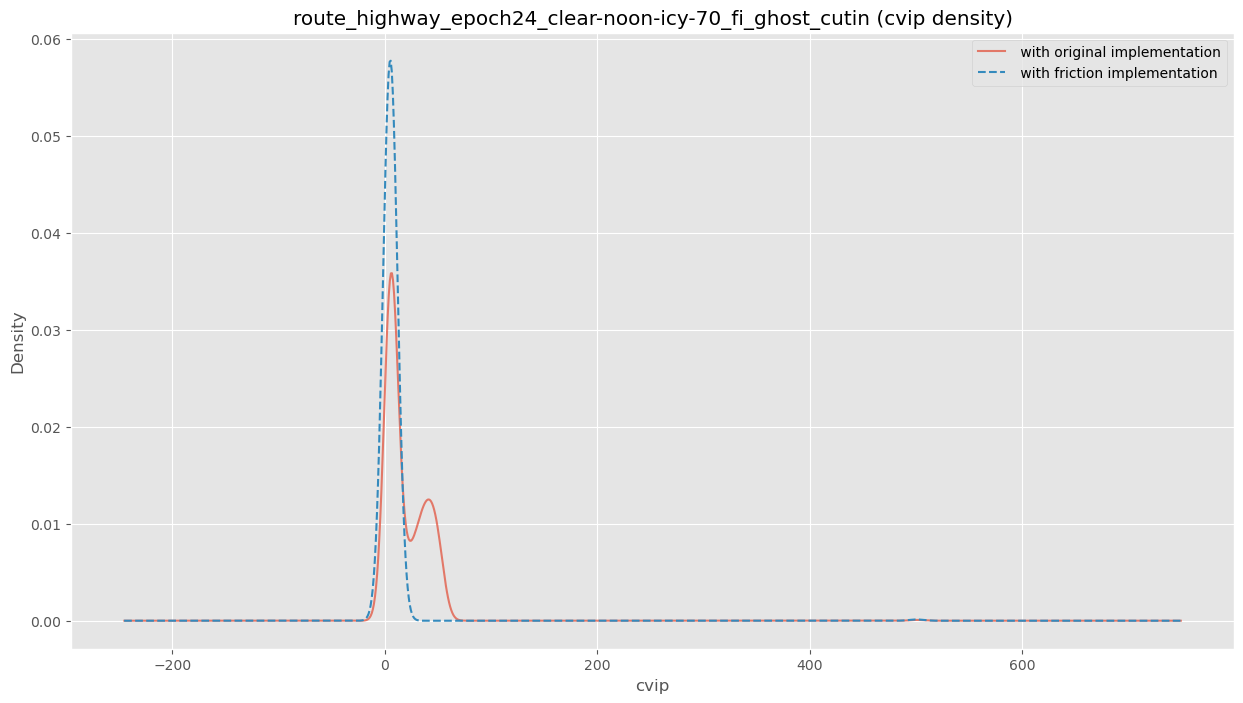

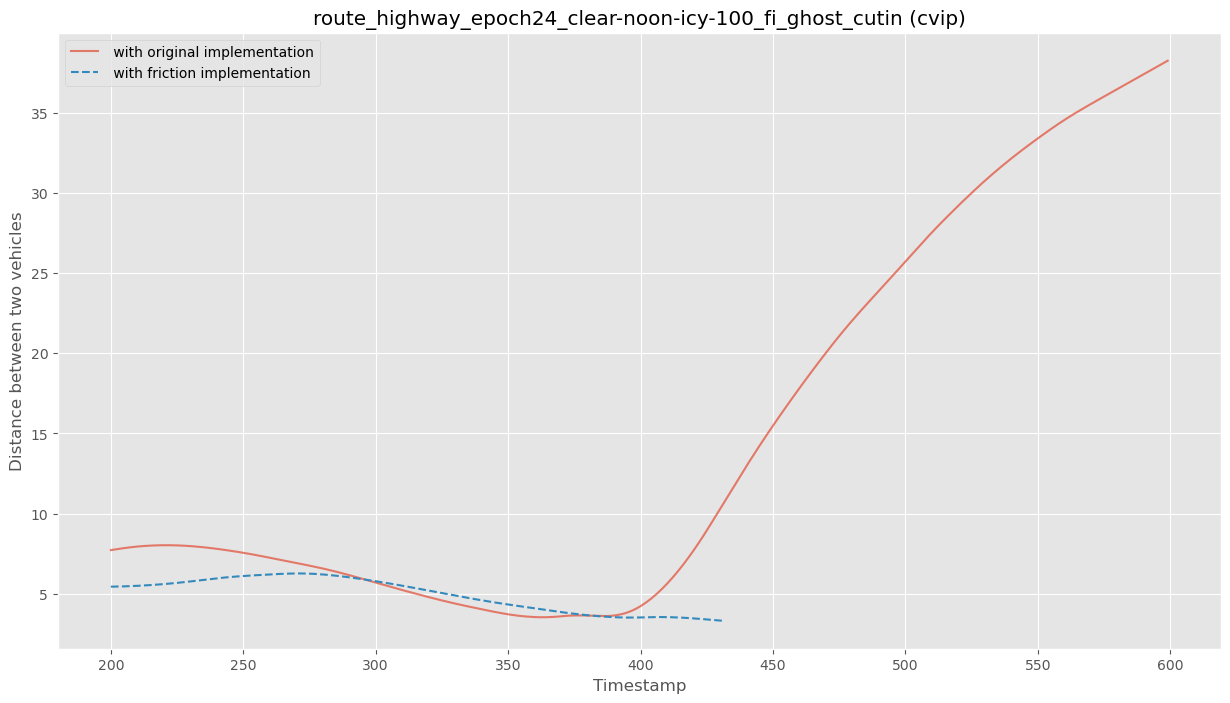

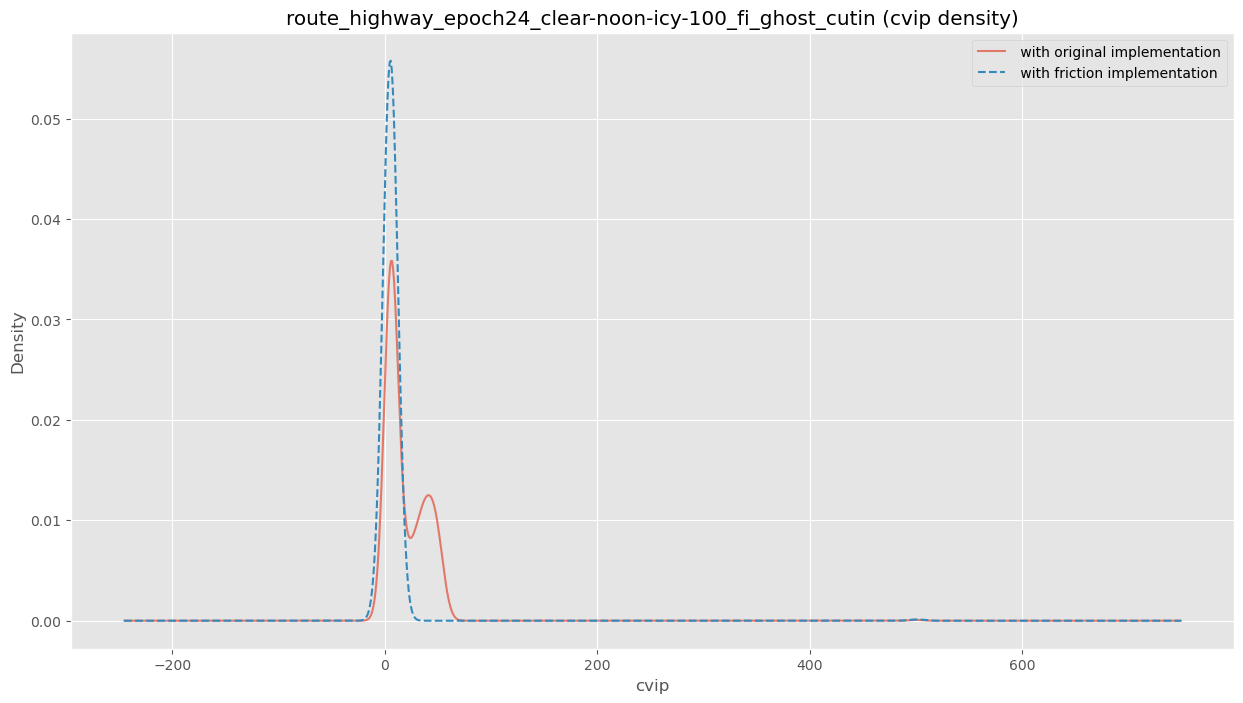

In [26]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))
    
    df_fric_cvip = pd.DataFrame()

    for i in range(len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['cvip'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['cvip'].isnull().values.any():
                df_fric_cvip["Run"+str(i)] = df_array_fric[weather][i]['cvip']

    median_fric_cvip = df_fric_cvip.median(axis=1)
    
    all_medians[weather][3] = median_fric_cvip
    
    plt.plot(median_orig_cvip.iloc[200:600], alpha=0.7)
    plt.plot(median_fric_cvip.iloc[200:600], '--')
    
    plt.title(subfolders[weather])
    plt.legend(friction_legend)
    plt.xlabel("Timestamp")
    plt.ylabel("Distance between two vehicles")
    plt.title(subfolders[weather] + " (cvip)")
    plt.show()
    
    plt.figure(figsize=(15,8))
    plt.xlabel("cvip")
    plt.ylabel("Density")
    median_orig_cvip.plot.density(alpha=0.7)
    median_fric_cvip.plot.density(style='--')
    plt.title(subfolders[weather] + " (cvip density)")
    plt.legend(friction_legend)
    plt.show()

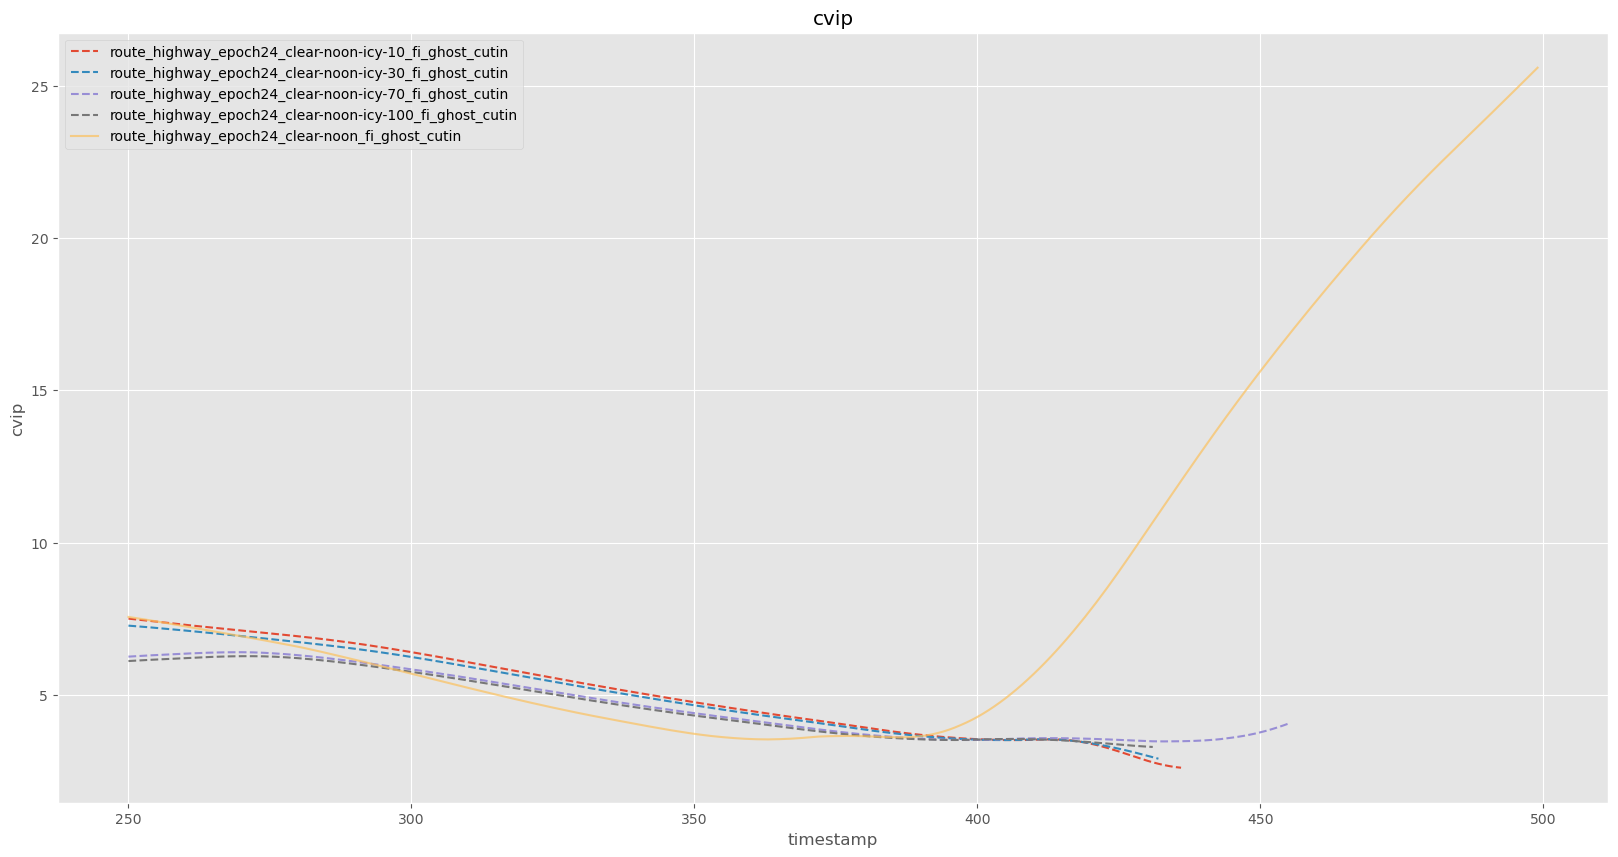

In [27]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    
    df_orig_cvip = pd.DataFrame()

    for i in range(0, len(df_array_fric)):
        if(df_array_fric[weather][i]['cvip'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['cvip'].isnull().values.any():
                df_orig_cvip["Run"+str(i)] = df_array_fric[weather][i]['cvip']

    median_orig_cvip = df_orig_cvip.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_cvip.iloc[250:500], alpha=0.7)
    else:
        plt.plot(median_orig_cvip.iloc[250:500], '--')

plt.xlabel("timestamp")
plt.ylabel("cvip")
plt.title("cvip")
plt.legend(full_legend)
plt.show()

### steer

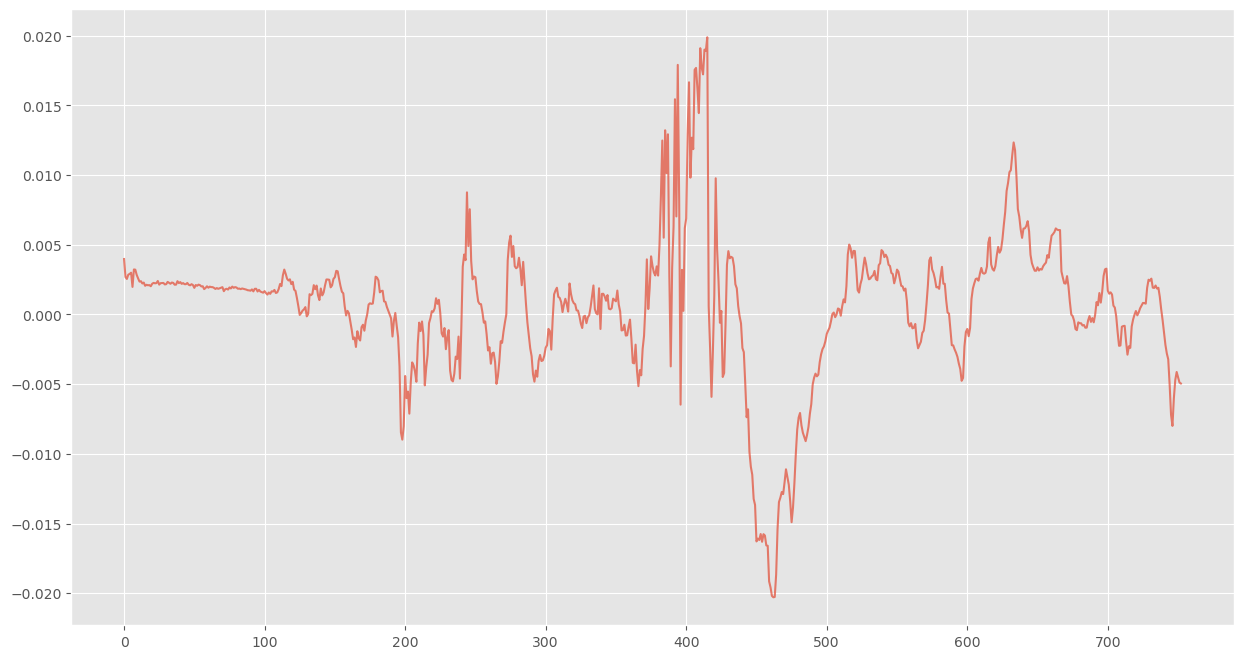

In [28]:
df_orig_steer = pd.DataFrame()

weather = -1

for i in range(0, len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['steer'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['steer'].isnull().values.any():
            df_orig_steer["Run"+str(i)] = df_array_fric[weather][i]['steer']

median_orig_steer = df_orig_steer.median(axis=1)
all_medians[weather][4] = median_orig_steer

plt.figure(figsize=(15,8))
plt.plot(median_orig_steer, alpha=0.7)

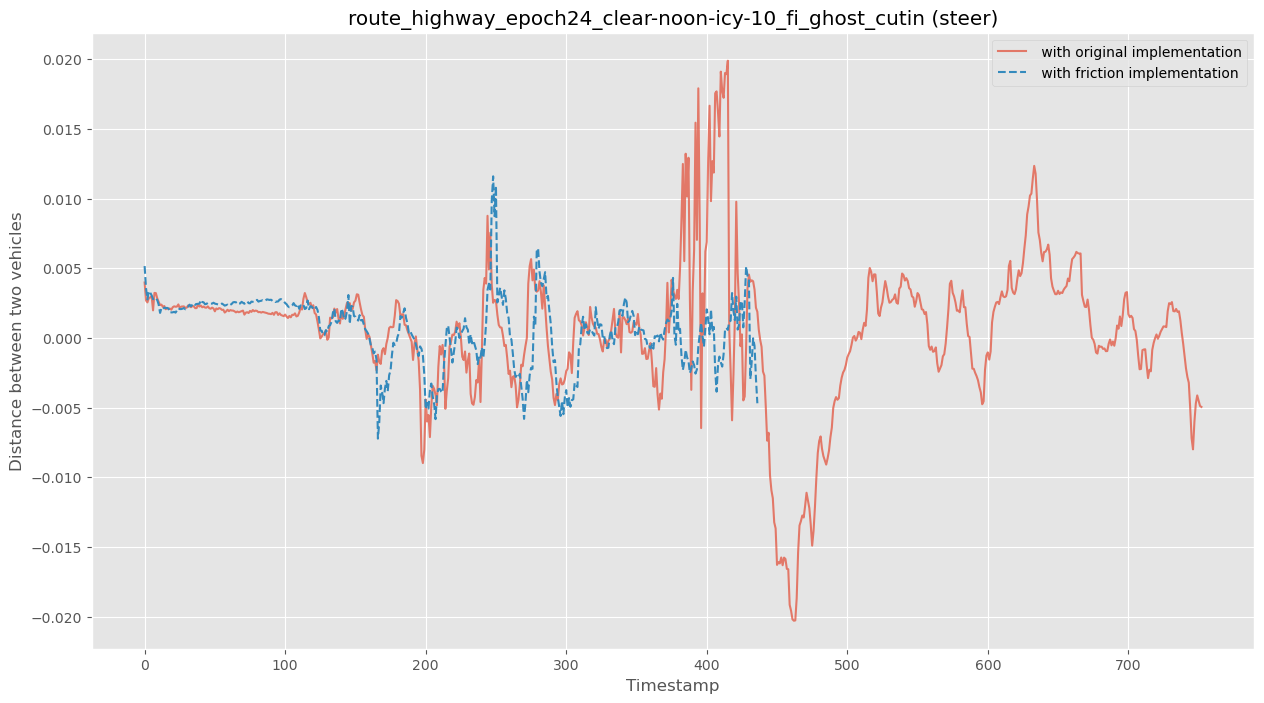

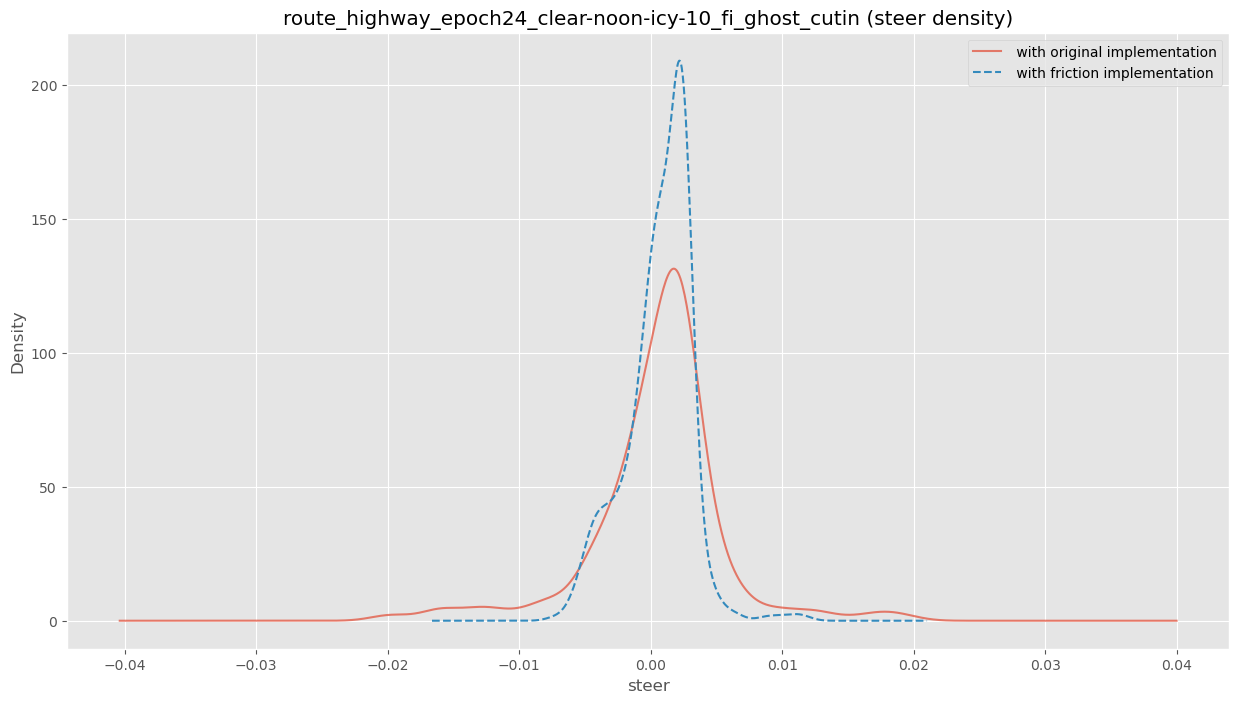

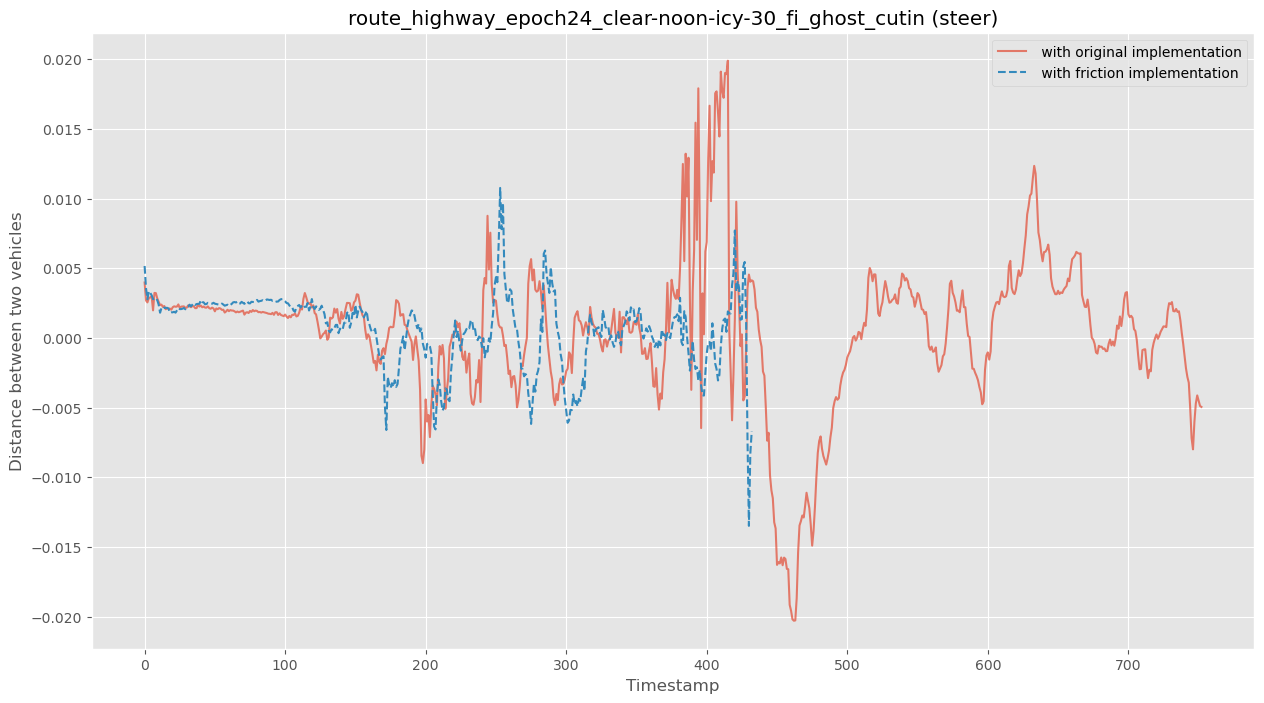

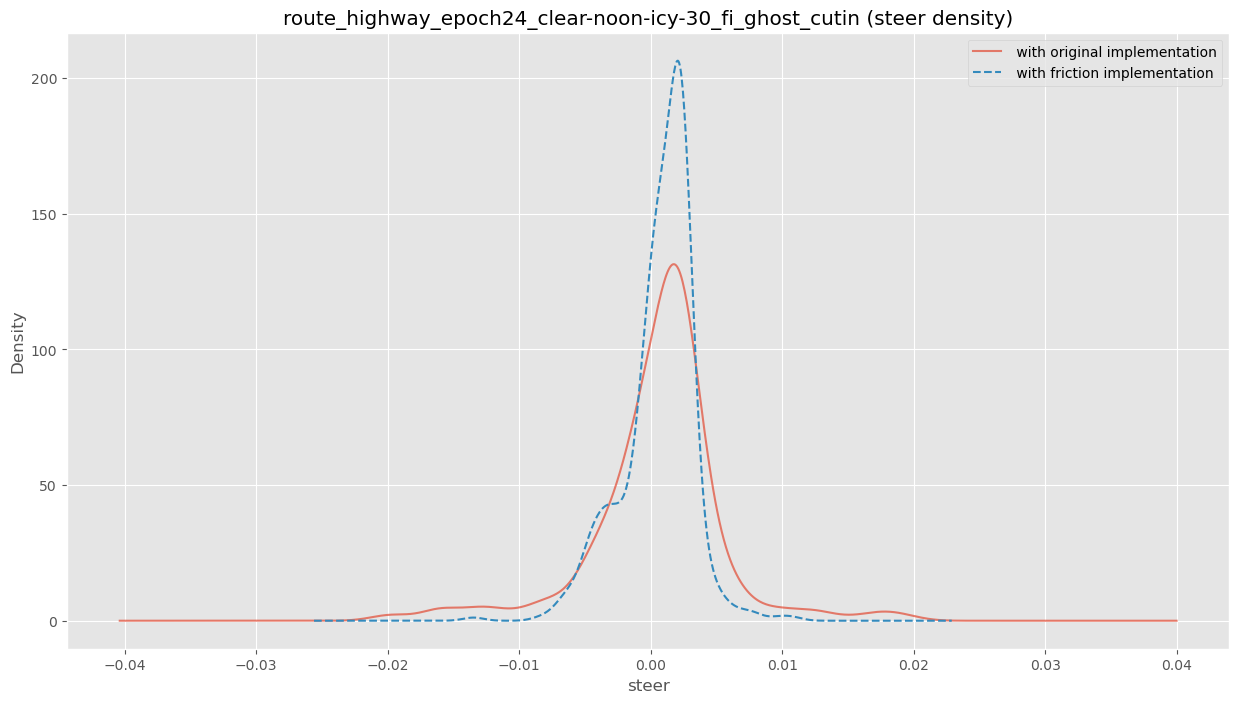

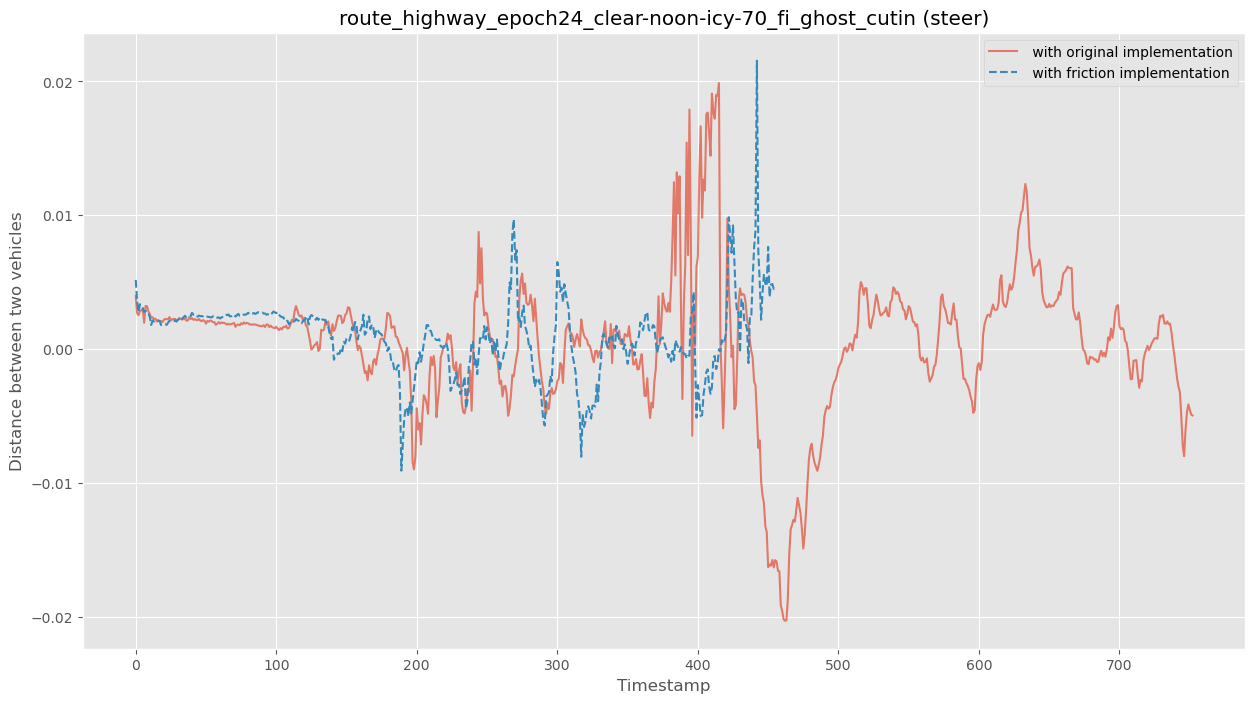

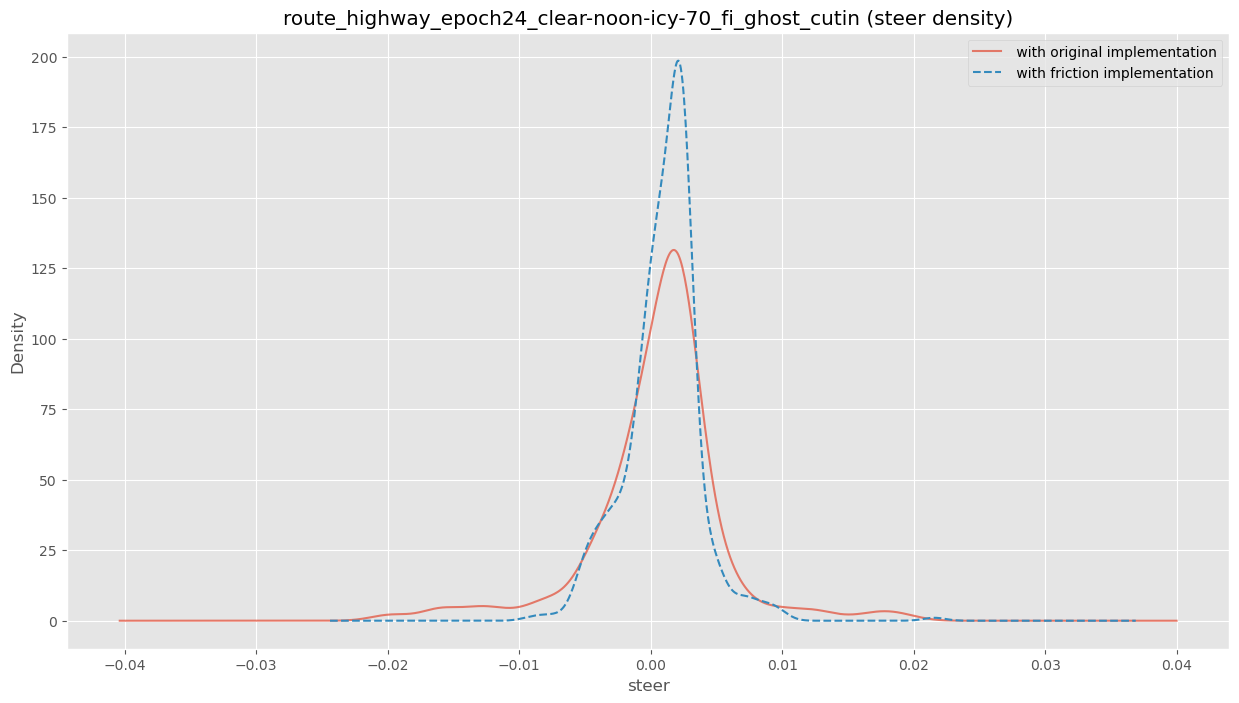

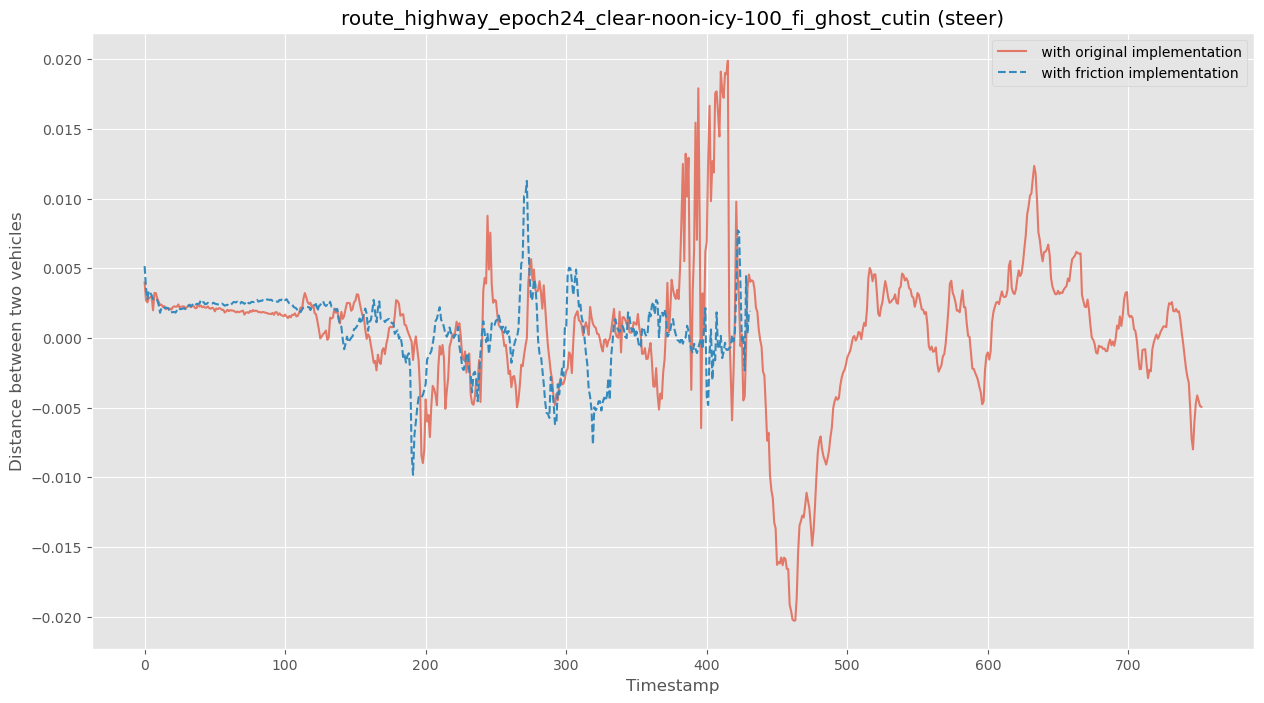

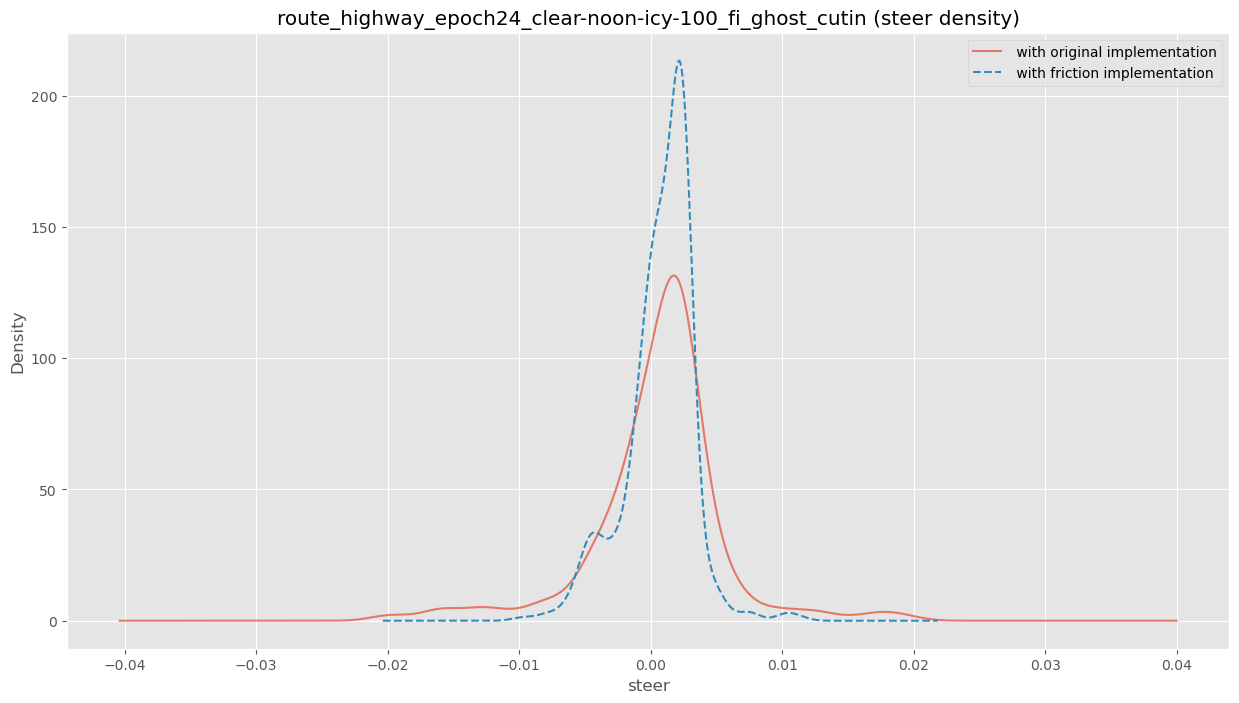

In [29]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))
    
    df_fric_steer = pd.DataFrame()

    for i in range(len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['steer'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['steer'].isnull().values.any():
                df_fric_steer["Run"+str(i)] = df_array_fric[weather][i]['steer']

    median_fric_steer = df_fric_steer.median(axis=1)
    
    all_medians[weather][4] = median_fric_steer
    
    plt.plot(median_orig_steer, alpha=0.7)
    plt.plot(median_fric_steer, '--')
    
    plt.title(subfolders[weather])
    plt.legend(friction_legend)
    plt.xlabel("Timestamp")
    plt.ylabel("Distance between two vehicles")
    plt.title(subfolders[weather] + " (steer)")
    plt.show()
    
    plt.figure(figsize=(15,8))
    plt.xlabel("steer")
    plt.ylabel("Density")
    median_orig_steer.plot.density(alpha=0.7)
    median_fric_steer.plot.density(style='--')
    plt.title(subfolders[weather] + " (steer density)")
    plt.legend(friction_legend)
    plt.show()

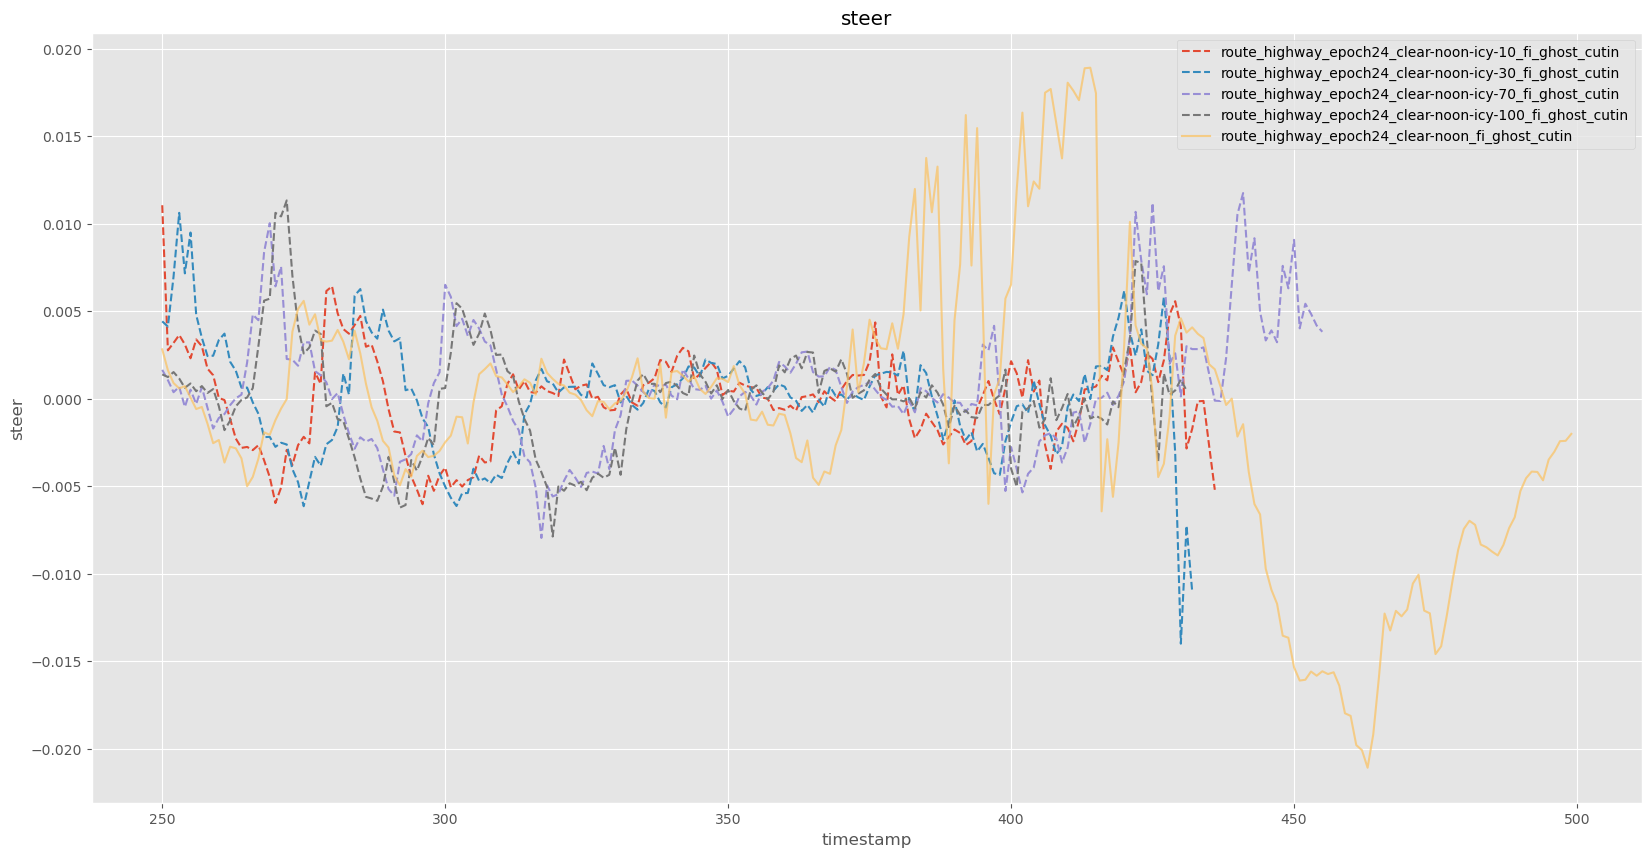

In [30]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    
    df_orig_steer = pd.DataFrame()

    for i in range(0, len(df_array_fric)):
        if(df_array_fric[weather][i]['steer'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['steer'].isnull().values.any():
                df_orig_steer["Run"+str(i)] = df_array_fric[weather][i]['steer']

    median_orig_steer = df_orig_steer.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_steer.iloc[250:500], alpha=0.7)
    else:
        plt.plot(median_orig_steer.iloc[250:500], '--')

plt.xlabel("timestamp")
plt.ylabel("steer")
plt.title("steer")
plt.legend(full_legend)
plt.show()

### brake

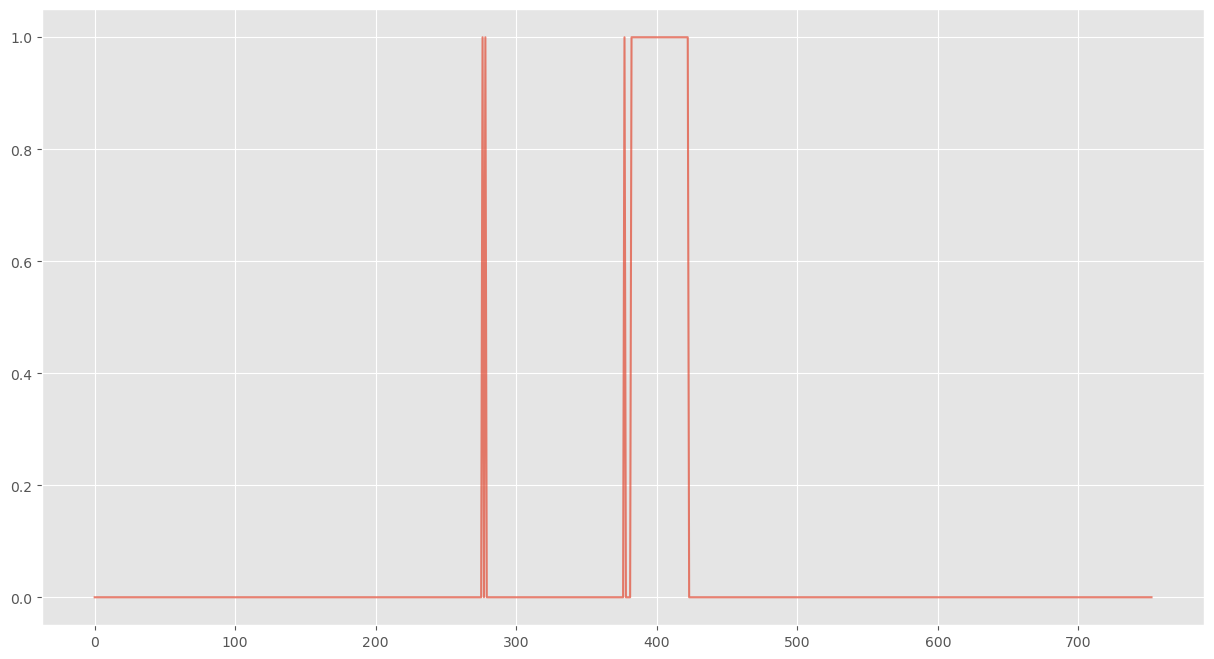

In [31]:
df_orig_brake = pd.DataFrame()

weather = -1

for i in range(0, len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['brake'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['brake'].isnull().values.any():
            df_orig_brake["Run"+str(i)] = df_array_fric[weather][i]['brake']

median_orig_brake = df_orig_brake.median(axis=1)
all_medians[weather][5] = median_orig_brake

plt.figure(figsize=(15,8))
plt.plot(median_orig_brake, alpha=0.7)

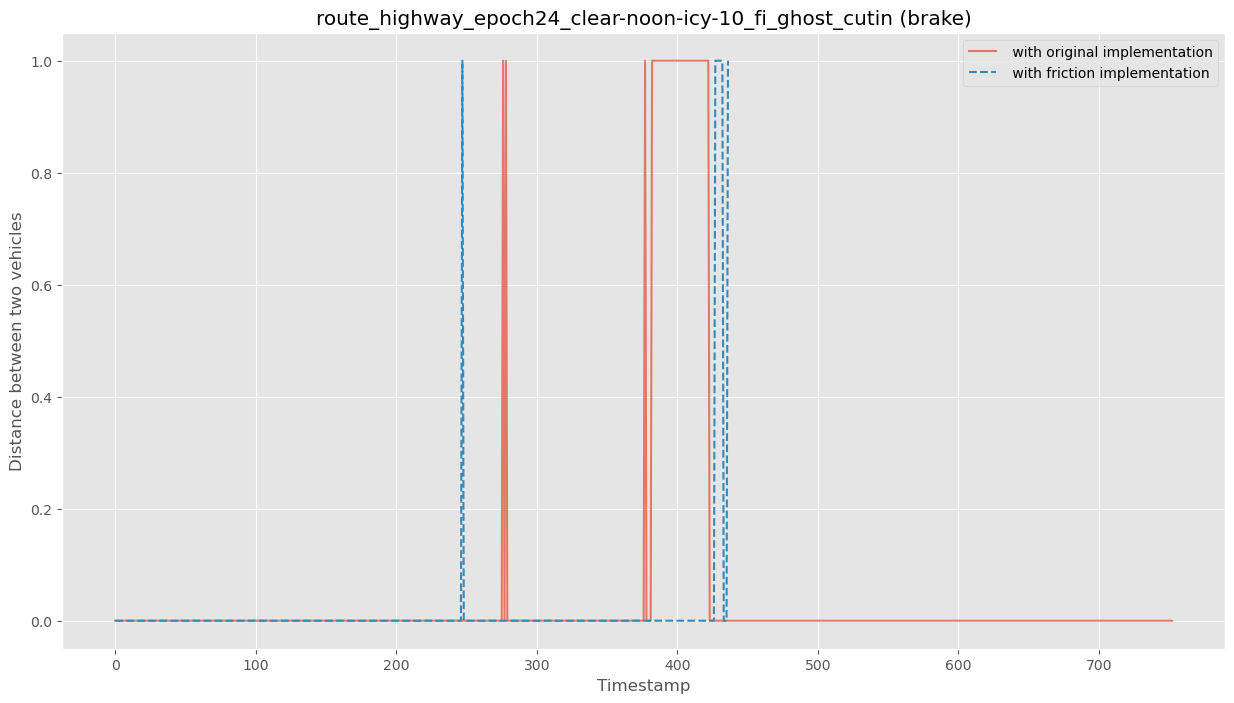

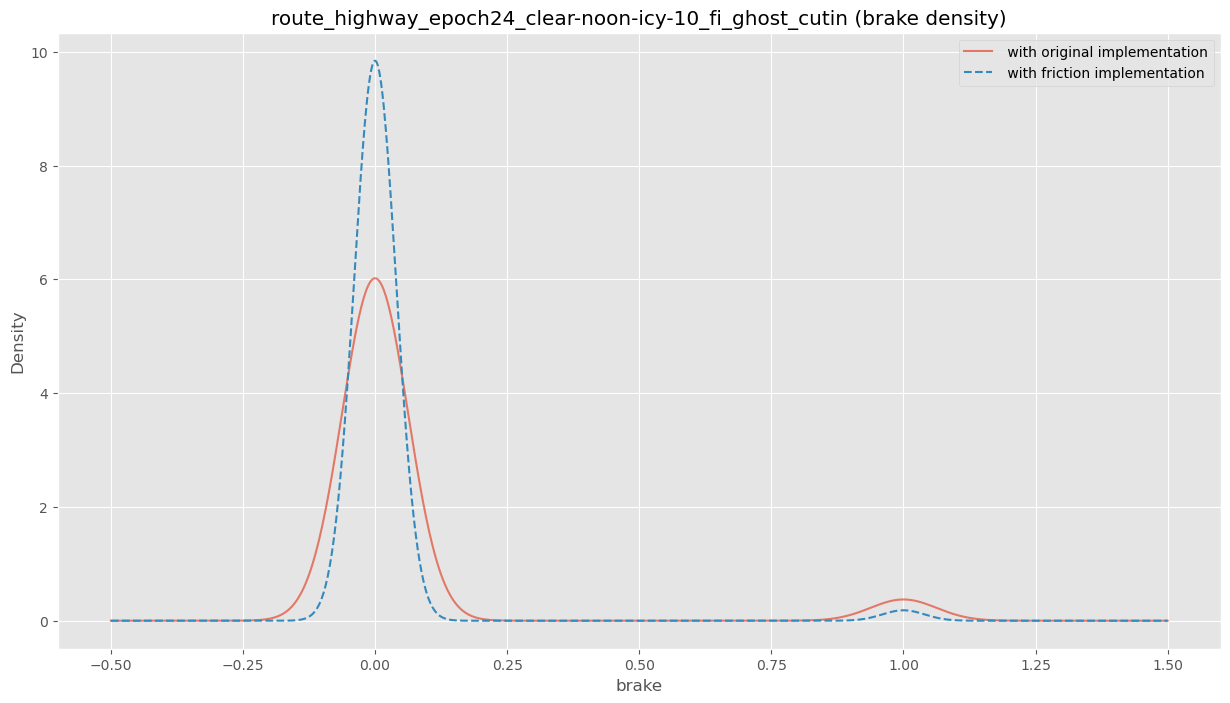

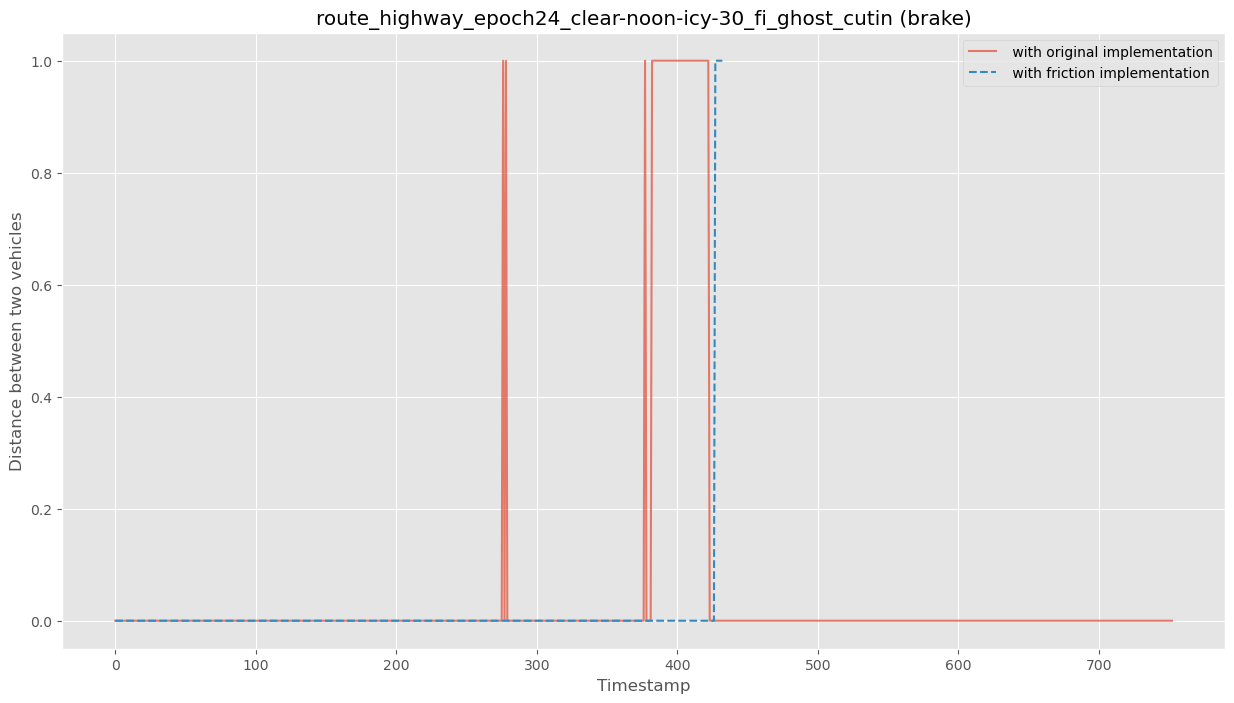

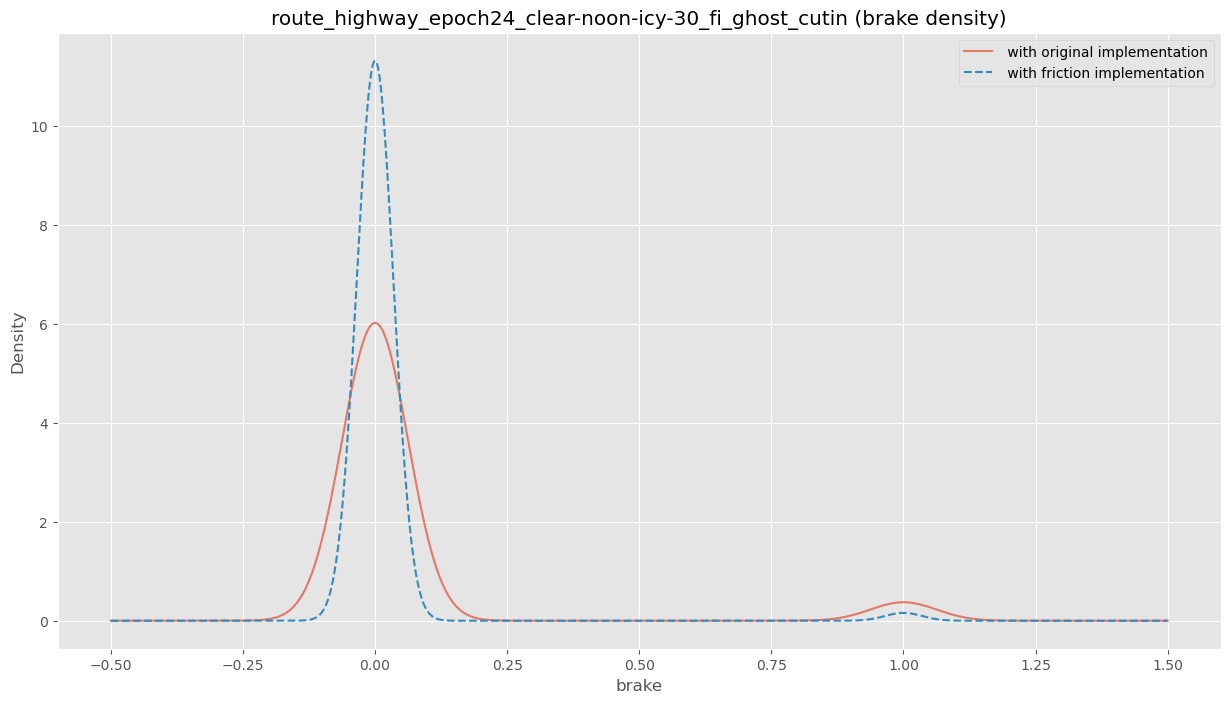

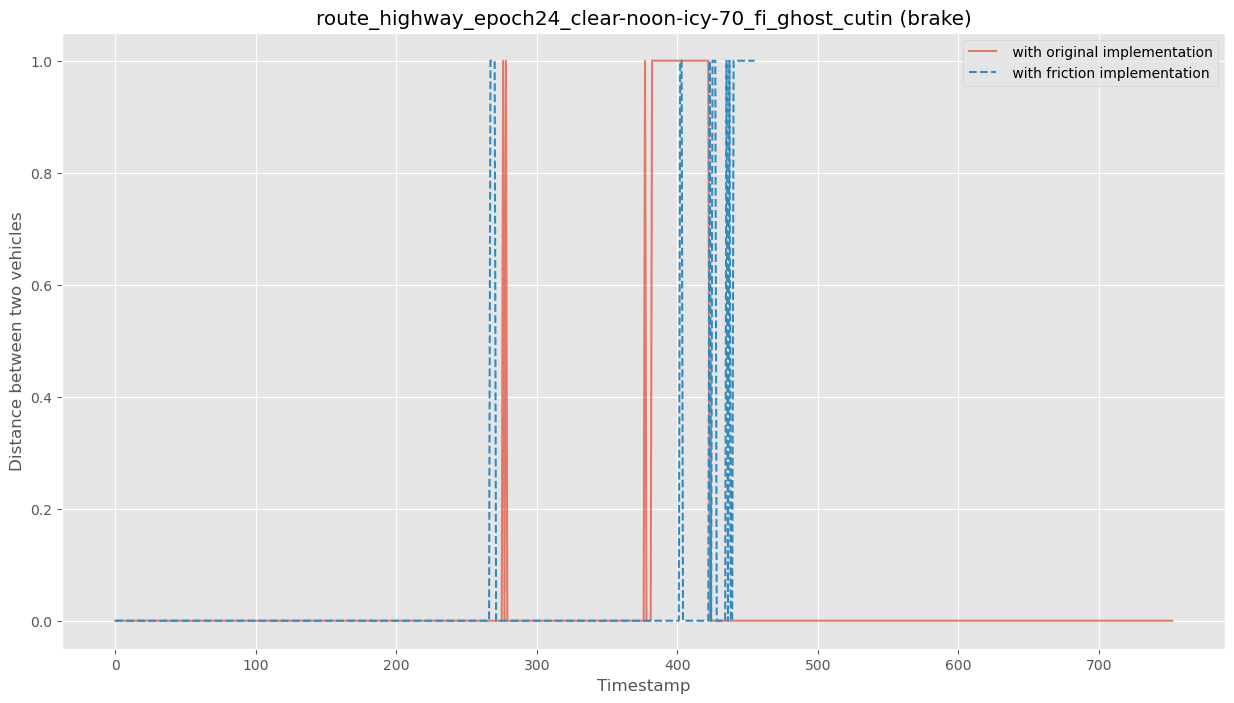

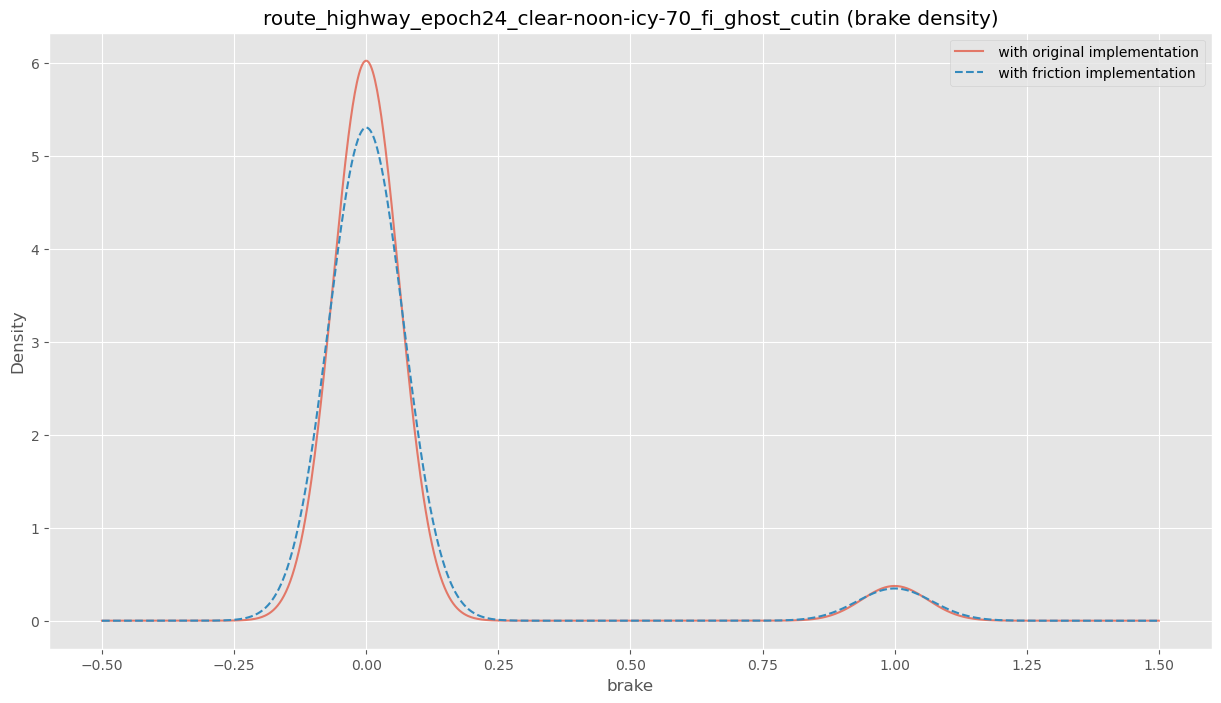

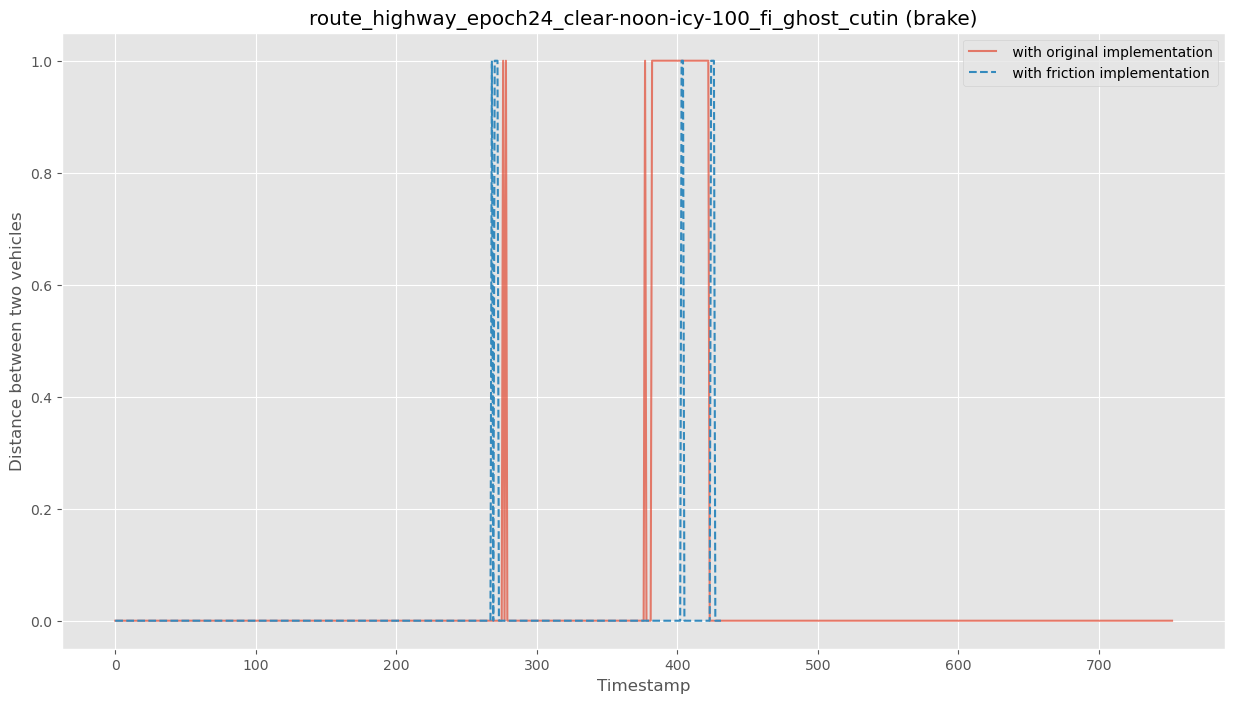

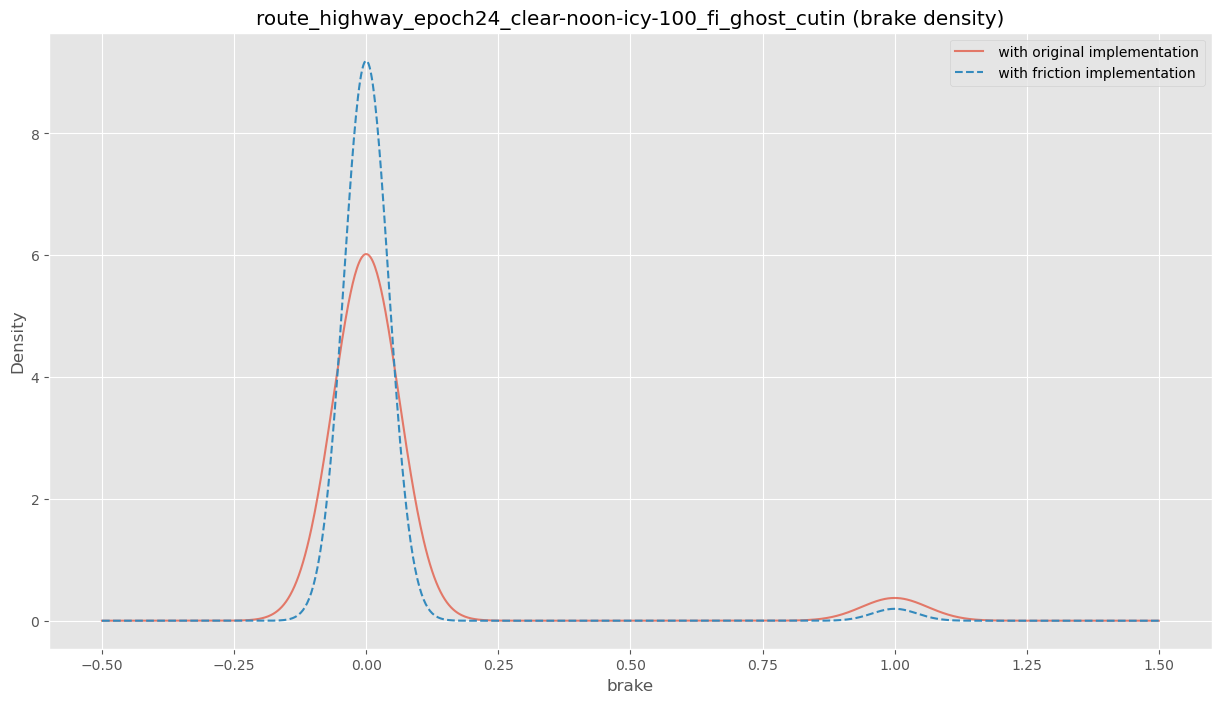

In [32]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))
    
    df_fric_brake = pd.DataFrame()

    for i in range(len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['brake'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['brake'].isnull().values.any():
                df_fric_brake["Run"+str(i)] = df_array_fric[weather][i]['brake']

    median_fric_brake = df_fric_brake.median(axis=1)
    
    all_medians[weather][5] = median_fric_brake
    
    plt.plot(median_orig_brake, alpha=0.7)
    plt.plot(median_fric_brake, '--')
    
    plt.title(subfolders[weather])
    plt.legend(friction_legend)
    plt.xlabel("Timestamp")
    plt.ylabel("Distance between two vehicles")
    plt.title(subfolders[weather] + " (brake)")
    plt.show()
    
    plt.figure(figsize=(15,8))
    plt.xlabel("brake")
    plt.ylabel("Density")
    median_orig_brake.plot.density(alpha=0.7)
    median_fric_brake.plot.density(style='--')
    plt.title(subfolders[weather] + " (brake density)")
    plt.legend(friction_legend)
    plt.show()

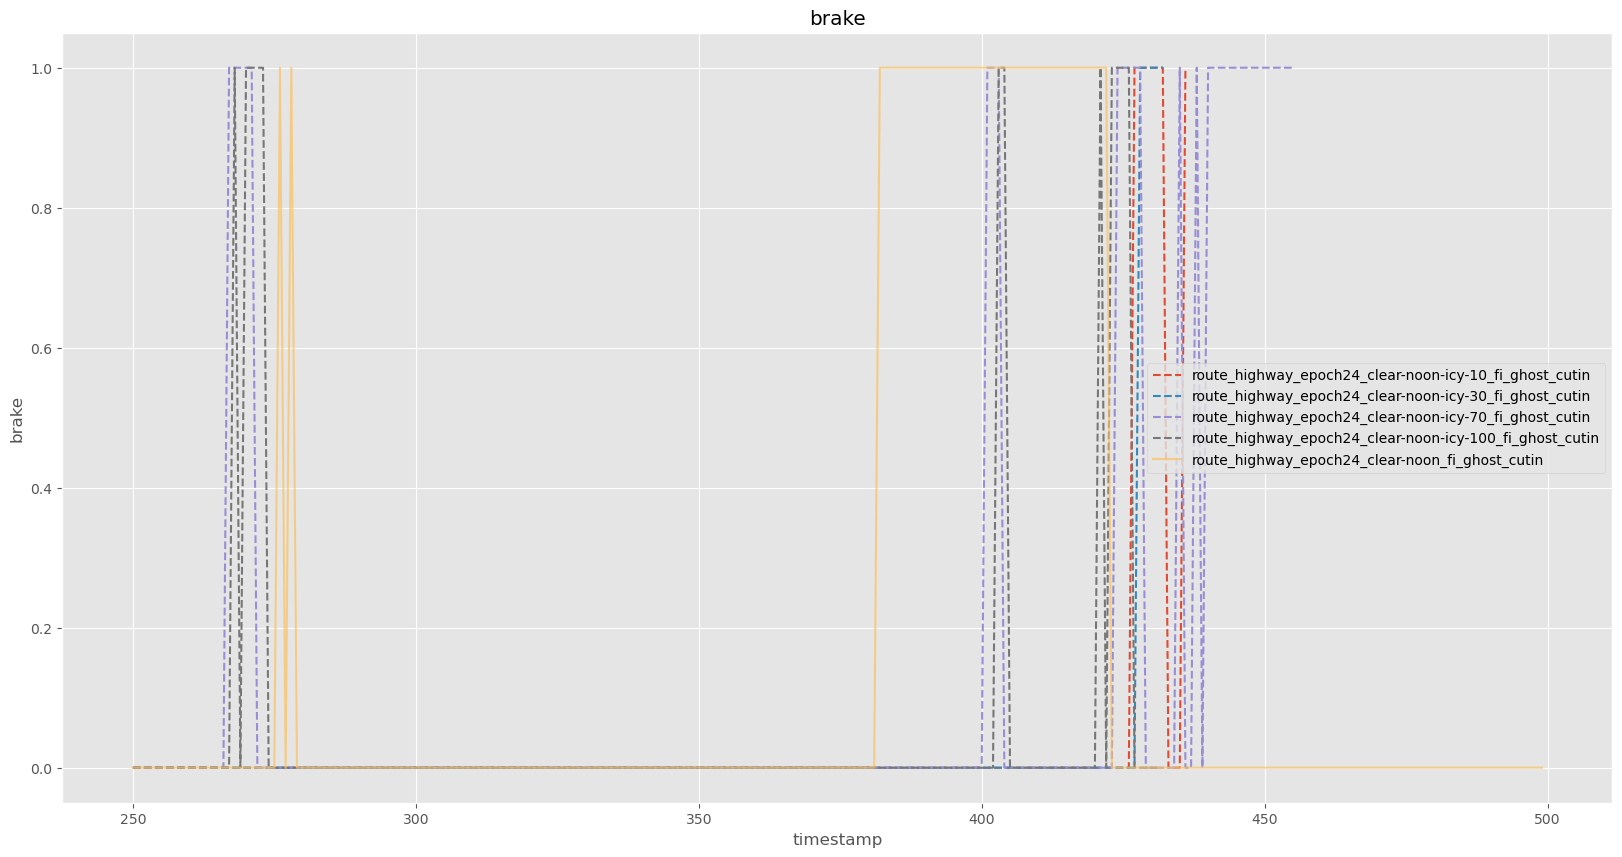

In [33]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    
    df_orig_brake = pd.DataFrame()

    for i in range(0, len(df_array_fric)):
        if(df_array_fric[weather][i]['brake'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['brake'].isnull().values.any():
                df_orig_brake["Run"+str(i)] = df_array_fric[weather][i]['brake']

    median_orig_brake = df_orig_brake.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_brake.iloc[250:500], alpha=0.7)
    else:
        plt.plot(median_orig_brake.iloc[250:500], '--')

plt.xlabel("timestamp")
plt.ylabel("brake")
plt.title("brake")
plt.legend(full_legend)
plt.show()

### Throttle

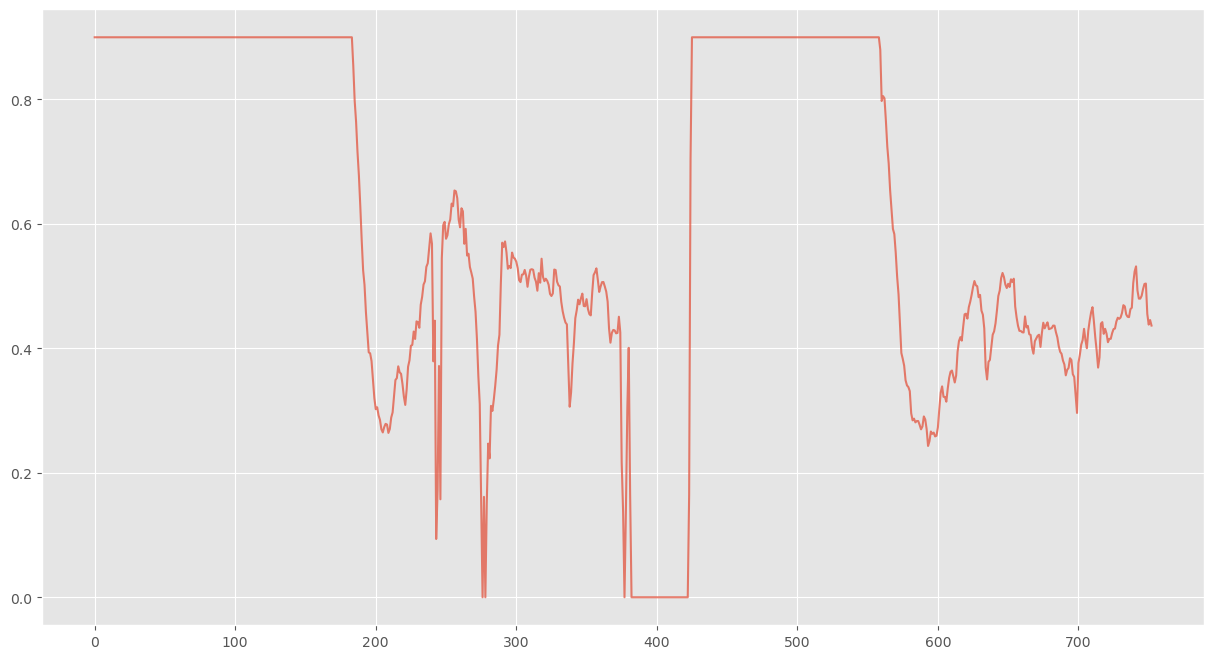

In [34]:
df_orig_throttle = pd.DataFrame()

weather = -1

for i in range(0, len(df_array_fric[weather])):
    if(df_array_fric[weather][i]['throttle'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[weather][i]['throttle'].isnull().values.any():
            df_orig_throttle["Run"+str(i)] = df_array_fric[weather][i]['throttle']

median_orig_throttle = df_orig_throttle.median(axis=1)
all_medians[weather][6] = median_orig_throttle

plt.figure(figsize=(15,8))
plt.plot(median_orig_throttle, alpha=0.7)

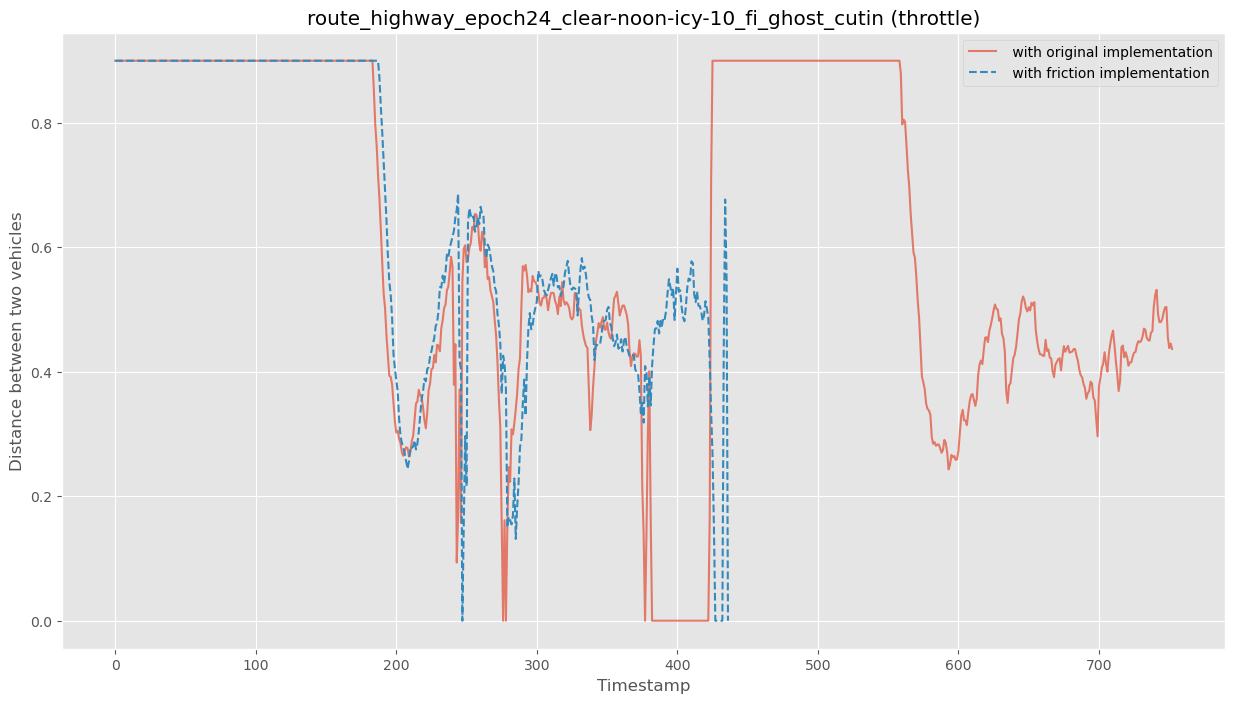

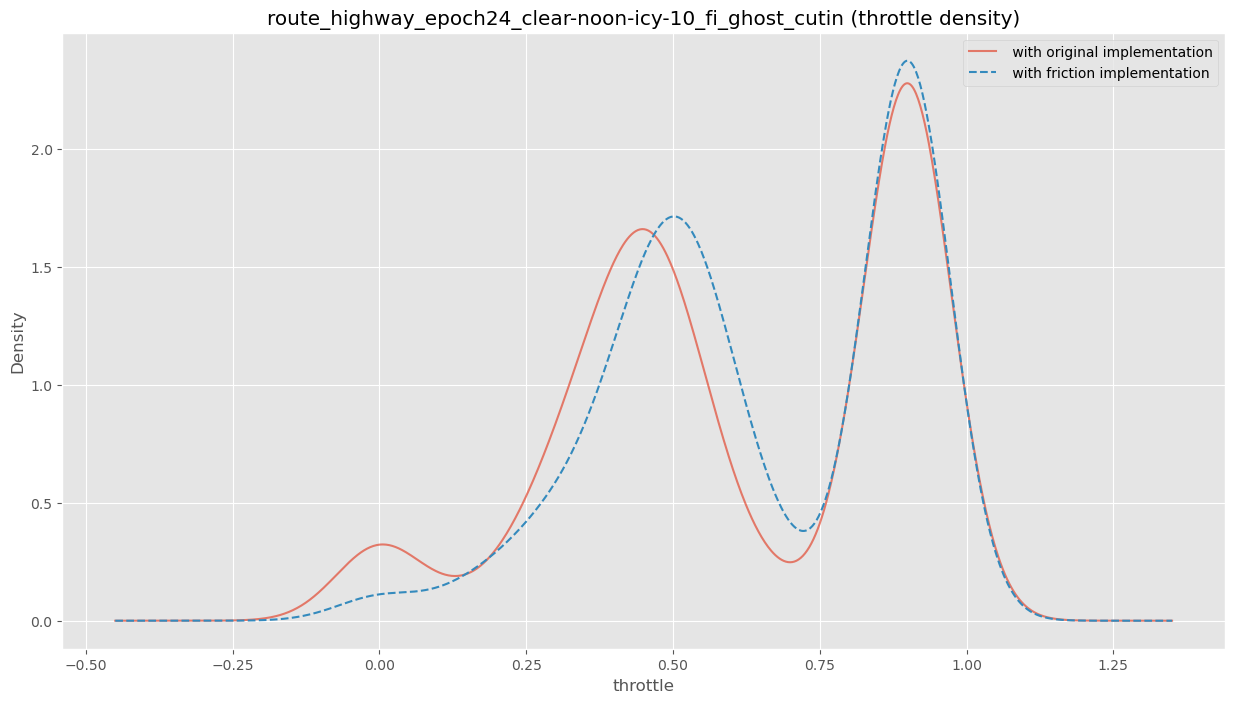

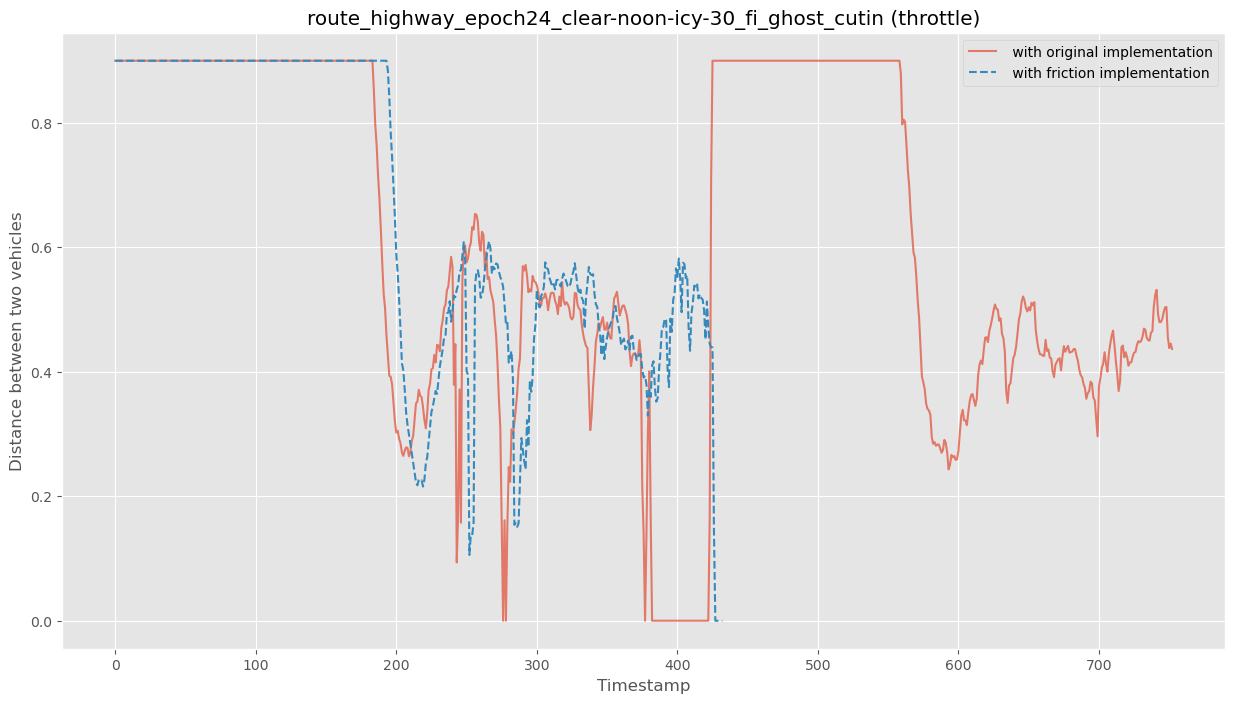

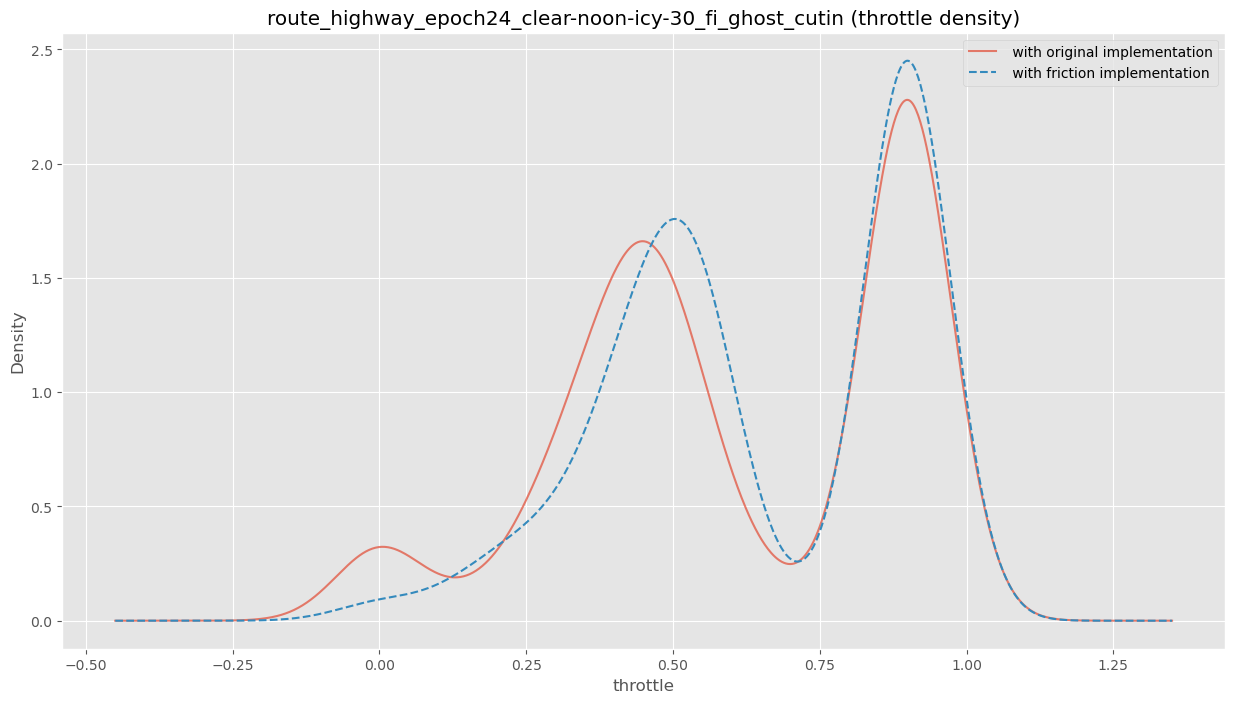

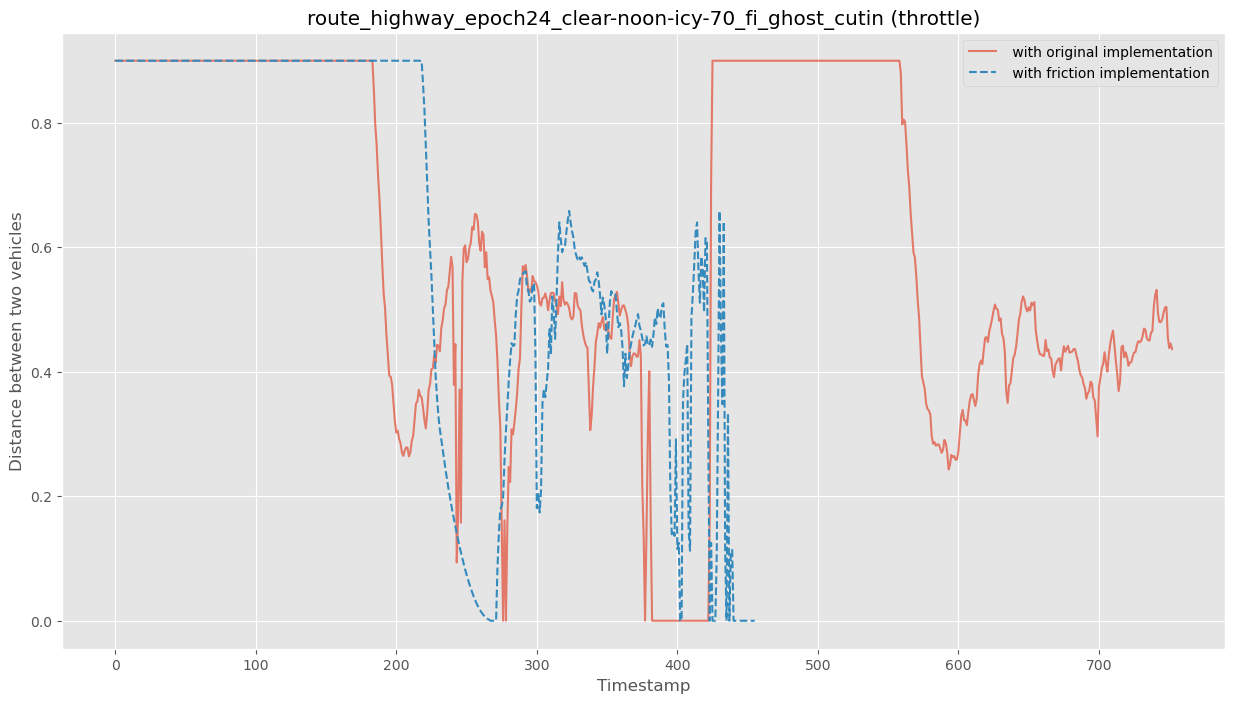

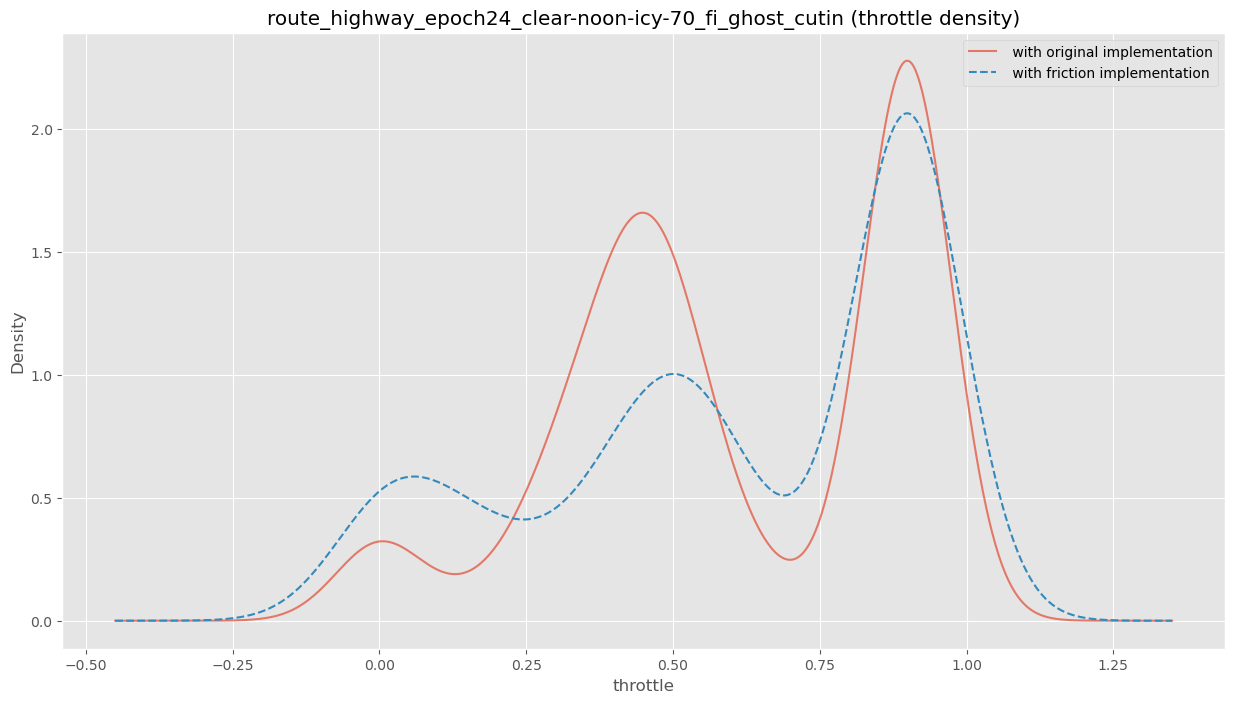

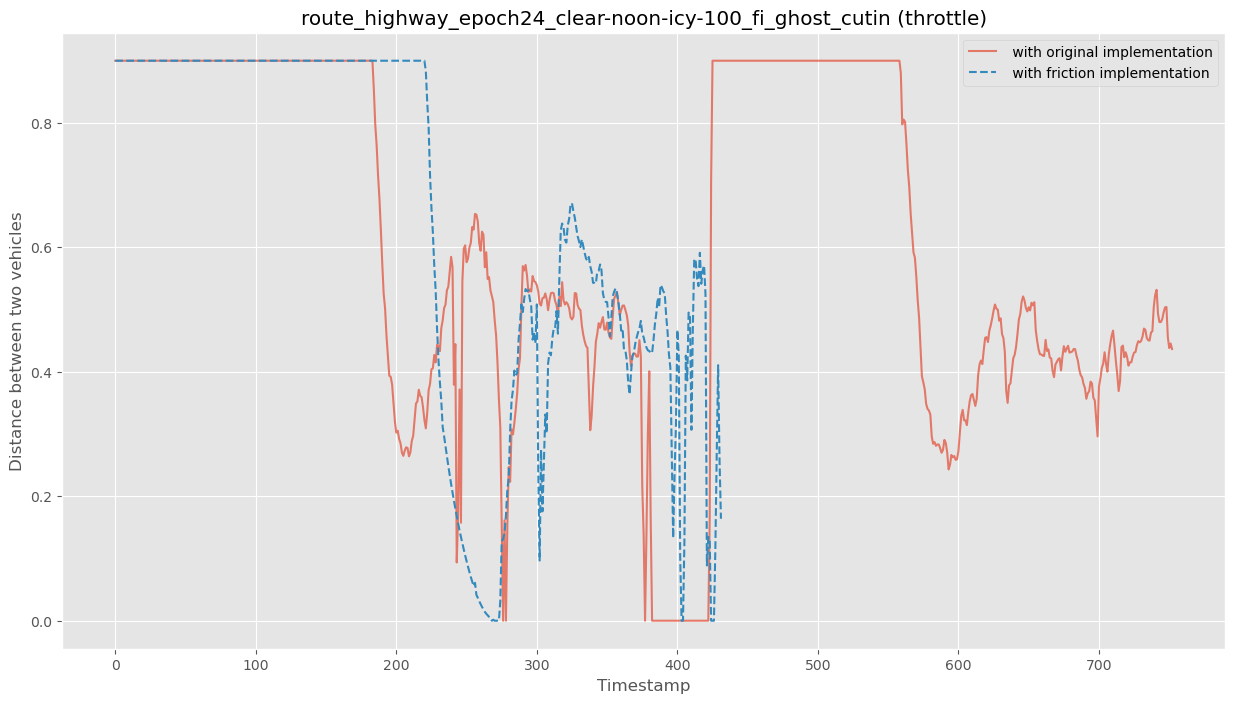

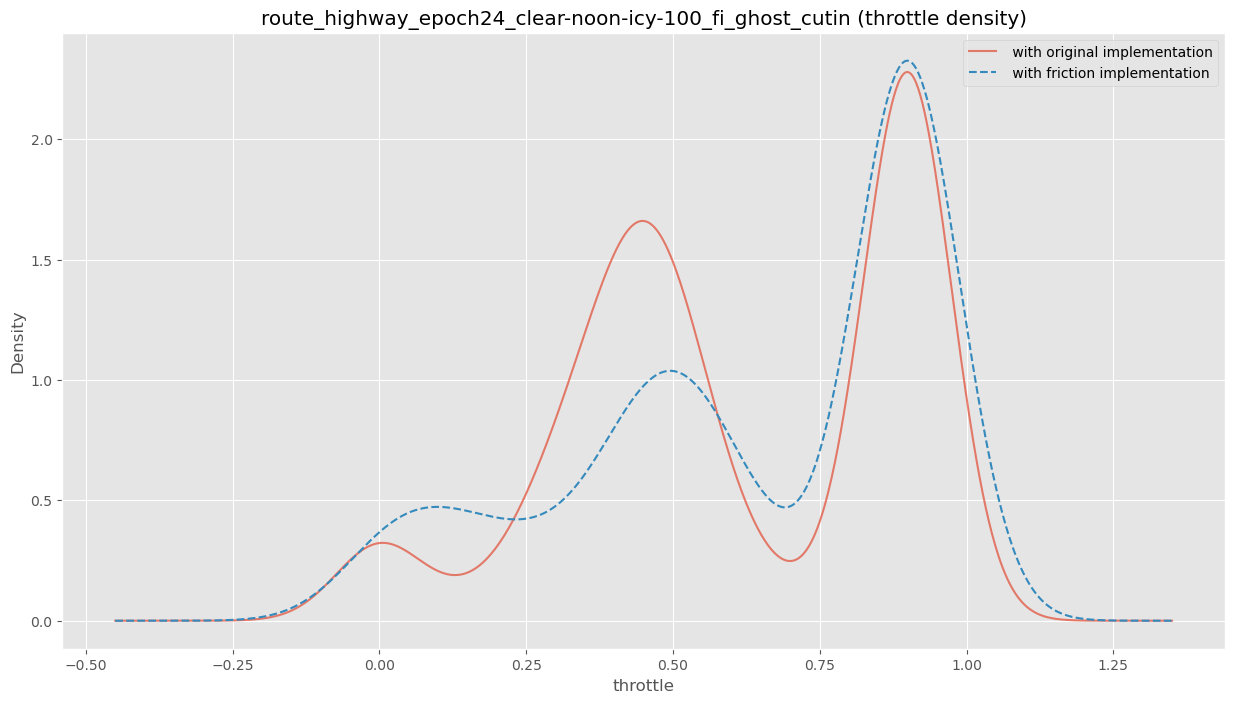

In [35]:
for weather in range(len(txt_lists_fric)-1):
    plt.figure(figsize=(15,8))
    
    df_fric_throttle = pd.DataFrame()

    for i in range(len(df_array_fric[weather])):
        if(df_array_fric[weather][i]['throttle'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['throttle'].isnull().values.any():
                df_fric_throttle["Run"+str(i)] = df_array_fric[weather][i]['throttle']

    median_fric_throttle = df_fric_throttle.median(axis=1)
    
    all_medians[weather][6] = median_fric_throttle
    
    plt.plot(median_orig_throttle, alpha=0.7)
    plt.plot(median_fric_throttle, '--')
    
    plt.title(subfolders[weather])
    plt.legend(friction_legend)
    plt.xlabel("Timestamp")
    plt.ylabel("Distance between two vehicles")
    plt.title(subfolders[weather] + " (throttle)")
    plt.show()
    
    plt.figure(figsize=(15,8))
    plt.xlabel("throttle")
    plt.ylabel("Density")
    median_orig_throttle.plot.density(alpha=0.7)
    median_fric_throttle.plot.density(style='--')
    plt.title(subfolders[weather] + " (throttle density)")
    plt.legend(friction_legend)
    plt.show()

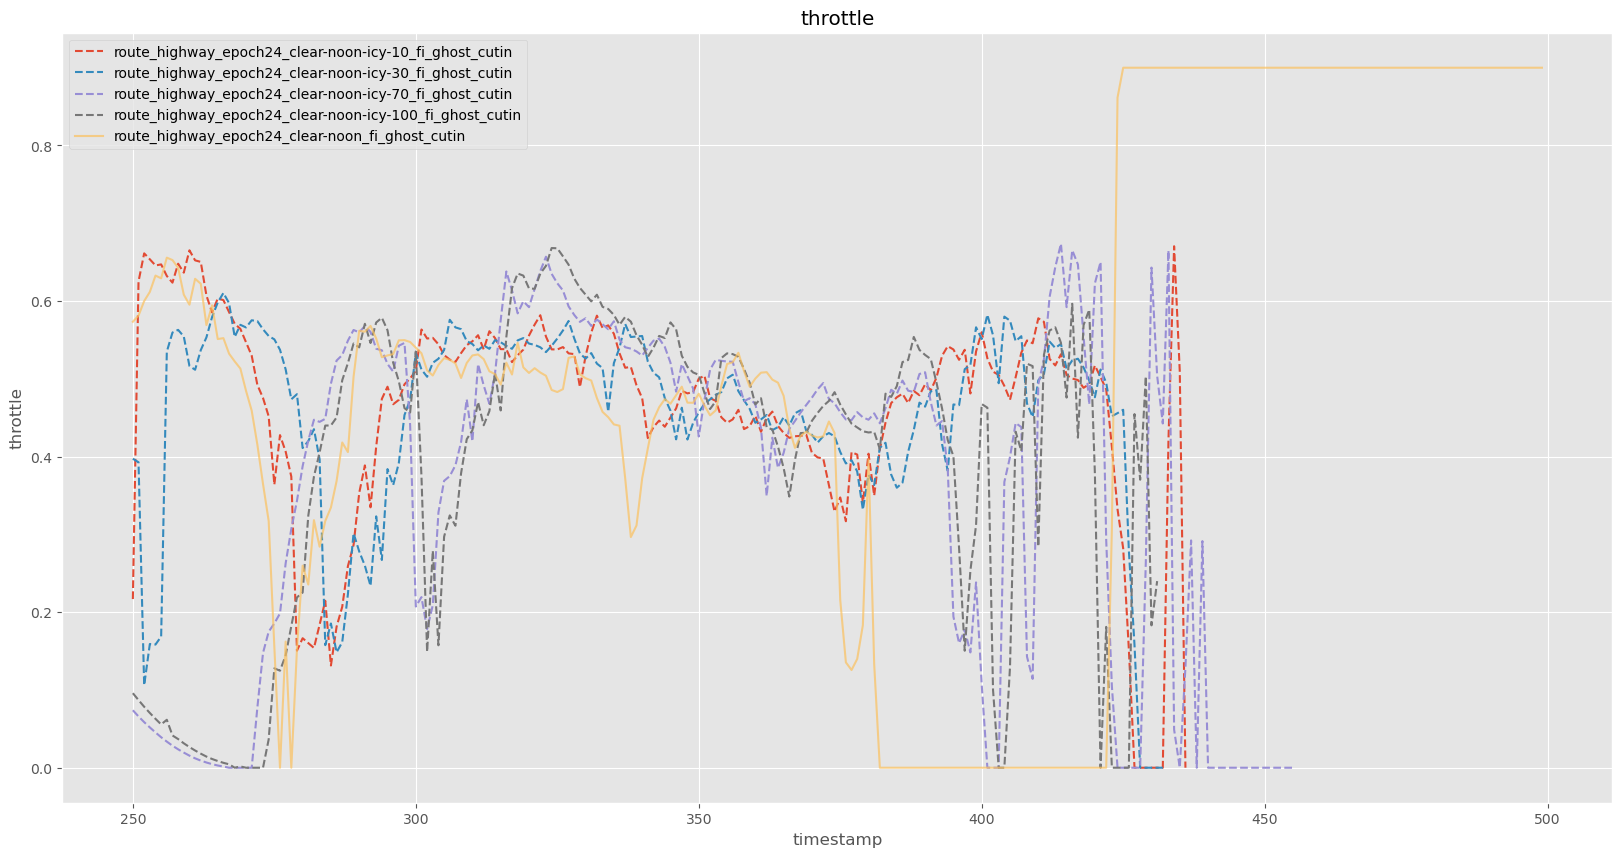

In [36]:
plt.figure(figsize=(20,10))

for weather in range(len(txt_lists_fric)):
    
    df_orig_throttle = pd.DataFrame()

    for i in range(0, len(df_array_fric)):
        if(df_array_fric[weather][i]['throttle'].dtypes == 'object'):
            print(i)
        else:
            if not df_array_fric[weather][i]['throttle'].isnull().values.any():
                df_orig_throttle["Run"+str(i)] = df_array_fric[weather][i]['throttle']

    median_orig_throttle = df_orig_throttle.median(axis=1)

    if weather == len(txt_lists_fric)-1:
        plt.plot(median_orig_throttle.iloc[250:500], alpha=0.7)
    else:
        plt.plot(median_orig_throttle.iloc[250:500], '--')

plt.xlabel("timestamp")
plt.ylabel("throttle")
plt.title("throttle")
plt.legend(full_legend)
plt.show()

## Dynamic time warping (DTW) for cvip
### measuring similarity between two temporal sequences

In [37]:
all_dtw = np.empty((len(txt_lists_fric)-1, len(attribute_order)))
# [[0] * len(attribute_order)  for i in range(len(txt_lists_fric)-1)]

for i in range(len(txt_lists_fric)-1):
    for j in range(len(attribute_order)):
        all_dtw[i][j] = dtw.distance(all_medians[i][j], all_medians[-1][j])

In [38]:
df = pd.DataFrame(all_dtw, columns = attribute_order, dtype = float)
df.index = subfolders[:-1]
df

x           y  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   3.351244  548.111283   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   3.433771  577.144694   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   3.589420  568.358786   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  4.219458  644.368096   

                                                                 v  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   41.701841   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   41.607889   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   42.443242   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  42.023092   

                                                               cvip     steer  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   584.605236  0.076523   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   585.672449  0.074946   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   596.810863  0.077229   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  593.693341  0.068720   

                                                            brake  throttle  
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   1.732051  3.285475  
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   7.071068  3.938631  
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   4.242641  3.828451  
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.000000  3.364424

## KS Test for cvip

In [39]:
import scipy as sp

In [40]:
all_ks = np.empty((len(txt_lists_fric)-1, len(attribute_order), 2))
# [[0] * len(attribute_order)  for i in range(len(txt_lists_fric)-1)]
for i in range(len(txt_lists_fric)-1):
    for j in range(len(attribute_order)):
        ks_test = sp.stats.ks_2samp(all_medians[i][j], all_medians[-1][j])
        all_ks[i][j][0] = ks_test.pvalue
        all_ks[i][j][1] = ks_test.statistic

In [41]:
df = pd.DataFrame(all_ks[:,:,0], columns = attribute_order, dtype = float)
df.index = subfolders[:-1]
df

x  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   1.314049e-40   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   4.631112e-44   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   1.446778e-41   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  3.290012e-51   

                                                                    y  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   1.042725e-38   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   1.297759e-42   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   1.140877e-41   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  1.427346e-52   

                                                                    v  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   4.877242e-03   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   1.254800e-03   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   2.602094e-07   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  1.546974e-05   

                                                                  cvip  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin    2.411048e-62   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin    5.547842e-71   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   5.712916e-106   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  2.898460e-106   

                                                            steer     brake  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.000017  0.744705   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.000030  0.624526   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.001009  1.000000   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.000006  0.814270   

                                                         throttle  
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.000036  
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.000032  
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.002005  
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.000046

In [42]:
df = pd.DataFrame(all_ks[:,:,1], columns = attribute_order, dtype = float)
df.index = subfolders[:-1]
df

x         y  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.402491  0.393134   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.420121  0.413306   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.401919  0.402417   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.452357  0.458167   

                                                                v      cvip  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.103488  0.495720   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.114946  0.528899   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.166003  0.628617   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.145446  0.639119   

                                                            steer     brake  \
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.144201  0.040126   
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.141295  0.044576   
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.114786  0.002971   
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.151653  0.037600   

                                                         throttle  
route_highway_epoch24_clear-noon-icy-10_fi_ghost_cutin   0.139539  
route_highway_epoch24_clear-noon-icy-30_fi_ghost_cutin   0.140847  
route_highway_epoch24_clear-noon-icy-70_fi_ghost_cutin   0.109448  
route_highway_epoch24_clear-noon-icy-100_fi_ghost_cutin  0.138566

You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level.